# 🎓 Proyecto: Estadística para Data Science

¡Bienvenido al reto final!

Este proyecto tiene como objetivo integrar y aplicar todas las habilidades estadísticas adquiridas durante el curso. El trabajo se divide en 4 partes:

1.  **Análisis Descriptivo (Dataset Libre):** Exploración profunda de un dataset de tu elección.
2.  **Inferencia y Modelado (Dataset Libre):** Análisis de relaciones y predicción sobre tus datos.
3.  **Regresión Lineal "From Scratch" (NumPy):** Implementación técnica de una regresión lineal simple usando solo matemáticas y NumPy.
4.  **Series Temporales:** Análisis de tendencia y estacionalidad en datos simulados.

---

###  Instrucciones Previas
Antes de comenzar, busca un dataset en [Kaggle](https://www.kaggle.com/) o una fuente confiable. Idealmente, debe tener:
*   Al menos 5 variables (numéricas y categóricas).
*   Un número razonable de filas (+1000).
*   Una variable numérica clara que te gustaría predecir (Target/Y).

**Justificación de decisiones**
* Cada elección relevante (dataset, variables, métricas, supuestos estadísticos, etc.) debe estar brevemente justificada desde un punto de vista estadístico.

**Validación de supuestos**
* Siempre que se aplique un modelo o técnica estadística, se deberán comprobar explícitamente sus supuestos (normalidad, independencia, homocedasticidad, linealidad, estacionariedad, etc., según corresponda).

**Interpretación de resultados**
* No basta con calcular estadísticas o ajustar modelos: los resultados deben ser interpretados en lenguaje claro, conectándolos con el contexto de los datos.

**Reproducibilidad**
* El trabajo debe ser completamente reproducible: cualquier persona debería poder ejecutar el código y obtener los mismos resultados sin modificaciones manuales.


## PARTE 1: Análisis Descriptivo (Dataset Propio)

**Objetivo:** Comprender la naturaleza de tus datos antes de modelar.

**Requisitos:**
1.  **Carga y Vista General:** Importa pandas, carga tu CSV y muestra las primeras filas, info y tipos de datos.
2.  **Clasificación de Variables:** Identifica explícitamente cuáles son Nominales, Ordinales, Discretas y Continuas.
3.  **Estadísticos Descriptivos:** Usa `.describe()` e interpreta la media vs mediana (¿Hay sesgo?).
4.  **Detección de Outliers:** Identifica valores atípicos en tus variables numéricas usando Boxplots y el criterio del Rango Intercuartílico (IQR).
5.  **Visualización de Distribuciones:** Plotea histogramas para tus variables principales.

**Conclusión:** Escribe un breve párrafo resumiendo la calidad de tus datos (¿Hay nulos? ¿Outliers? ¿Sesgo?).

-------

**Amplia el analisis:**

- **Análisis de valores nulos**  
  Identifica la cantidad y el porcentaje de valores nulos por variable. Reflexiona brevemente sobre si su presencia parece aleatoria o estructural.

- **Comparación entre variables numéricas**  
  Selecciona al menos dos variables numéricas y analiza si presentan escalas o rangos muy distintos, comentando posibles implicaciones para futuros modelos.

  También se debe valorar como son los valores de las diferentes metricas para diferentes categorías dentro de tu data set. ej Diferencias por genero, edad, zona geográfica ...

- **Asimetría y curtosis**  
  Calcula la asimetría (skewness) de al menos una variable numérica e interpreta su relación con la forma observada en el histograma.

- **Outliers: impacto potencial**  
  Para una variable con outliers detectados, discute brevemente cómo podrían afectar al análisis inferencial o a un modelo predictivo posterior.

- **Calidad global del dataset**  
  Amplía la conclusión final incorporando una valoración general de si el dataset está “listo para modelar” o si requeriría una fase adicional de limpieza y transformación.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')

## 1. Cargar y exploración inicial datos


In [3]:
df = pd.read_csv('student_depression_dataset.csv')

In [4]:
# 1.1 Vista inicial de nuestra base de datos
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [5]:
# 1.2 Dimensiones de la base de datos
df.shape

(27901, 18)

In [6]:
# 1.3 Revisión general de filas, columnas, tipos de datos y nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [7]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

## 2. Normalización de nombres de columnas y conversión de tipos


In [8]:
# 2.1 Normalizamos los nombres de las columnas del dataframe original
df.columns = (
    df.columns
        .str.lower()                  # Convertimos todos los nombres a minúsculas para consistencia
        .str.strip()                  # Eliminamos espacios al inicio o final de los nombres
        .str.replace(" ","_")         # Sustituimos espacios por guiones bajos para facilitar el acceso por código
        .str.replace("?","", regex=False)  # Eliminamos caracteres especiales como '?', que pueden dar problemas en análisis
        .str.replace("/","_")        # Reemplazamos '/' por '_' para mantener un formato consistente y compatible
)

# 2.2 Creamos un dataframe limpio excluyendo columnas irrelevantes o con datos casi nulos
df_clean = df.drop(columns=["id", "work_pressure", "job_satisfaction"])
# - 'id': no aporta información estadística, solo identifica filas
# - 'work_pressure': la mayoría de los valores son 0, aporta poca información
# - 'job_satisfaction': similar a 'work_pressure', casi todos los valores son 0

# 2.3 Renombramos columnas con nombres largos o poco manejables
df_clean = df_clean.rename(columns = {
    "have_you_ever_had_suicidal_thoughts_":"suicidal_thoughts",  # Más corto y descriptivo
    "family_history_of_mental_illness":"family_mental_illness"   # Más corto y fácil de usar en análisis
})

# 2.4 Convertir a entero y elimnar filas con "?"
df_clean["financial_stress"] = df_clean["financial_stress"].replace("?", np.nan)
df_clean = df_clean[df_clean["financial_stress"].notna()]
    # Primero a float, luego a int
df_clean['financial_stress'] = df_clean['financial_stress'].astype(float).astype(int)



## 3. Limpieza de valores dentro de columnas y transformaciones.

In [9]:
# 3.1 Convertimos variables binarias de tipo 'Yes'/'No' a 1/0 para análisis estadístico y modelado
df_clean["suicidal_thoughts"] = df_clean["suicidal_thoughts"].map({"Yes":1,"No":0})
df_clean["family_mental_illness"] = df_clean["family_mental_illness"].map({"Yes":1,"No":0})
# Esto permite que las columnas sean numéricas y puedan usarse directamente en cálculos y modelos

# 3.2 Limpiamos valores de texto en columnas categóricas
cols_to_clean = ["sleep_duration", "degree", "profession"]
for col in cols_to_clean:
    df_clean[col] = df_clean[col].str.strip().str.replace("'", "")
    # .str.strip(): elimina espacios al inicio o final de cada valor
    # .str.replace("'", ""): elimina comillas simples literales que puedan venir del CSV
    # Esto asegura que los valores categóricos sean consistentes y limpios para análisis o gráficos

# 3.3 Mapear strings a números según orden, para así poder analizar posteriormente
dietary_map = {'Unhealthy': 0, 'Moderate': 1, 'Healthy': 2}
df_clean['dietary_habits'] = df_clean['dietary_habits'].map(dietary_map)

In [10]:
# Mostramos una muestra aleatoria del dataframe limpio para verificar los cambios
df_clean.sample()
# Permite revisar visualmente que:
# - los nombres de columnas están normalizados
# - las variables binarias se convirtieron a 0/1
# - los valores de texto están limpios
# - se eliminaron columnas irrelevantes

,gender,age,city,profession,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_mental_illness,depression
4083,Female,33.0,Indore,Student,2.0,5.79,5.0,7-8 hours,1.0,B.Pharm,0,0.0,4,1,0


## 4. Clasificación de Variables en el Dataset

#### - Variables Nominales (4)
Categorías sin orden natural:
- **gender**: male/female
- **city**: nombre de ciudad
- **profession**: ocupación
- **degree**: título académico

#### - Variables Ordinales (5)
Categorías con orden natural (incluye ordinales discretas):
- **sleep_duration**: rangos categóricos ('<5', '5-6', '7-8', '>8' horas)
- **academic_pressure**: escala 0-5 (ordinal discreta)
- **study_satisfaction**: escala 0-5 (ordinal discreta)
- **dietary_habits**: 0=Unhealthy < 1=Moderate < 2=Healthy (ordinal discreta)
- **financial_stress**: escala 1-5 (ordinal discreta)

#### - Variables Continuas (2)
Valores numéricos medibles con decimales:
- **cgpa**: promedio académico, escala 0-10 con decimales
- **work_study_hours**: horas de trabajo/estudio diarias

#### - Variables Discretas (1)
Números enteros contables:
- **age**: años completos, valores enteros (18-59)

#### Variables Binarias (3)
Solo dos valores posibles (0/1):
- **suicidal_thoughts**: 0=No, 1=Yes
- **family_mental_illness**: 0=No, 1=Yes
- **depression**: 0=No, 1=Yes **(variable objetivo)**

---

#### Notas para Análisis

- **Variables ordinales** con escala numérica (academic_pressure, study_satisfaction, financial_stress, dietary_habits) se tratan como **numéricas** para cálculos estadísticos (media, skewness, curtosis).

- **Variables binarias** son un subtipo de nominal, pero se tratan como **numéricas (0/1)** para análisis estadístico y modelado predictivo.

- **Variables nominales** requieren encoding para modelado:
  - One-hot encoding: gender, city, profession, degree
  - Label encoding solo si hay muchas categorías

- **Variable objetivo**: `depression` (binaria, 0=No depresión, 1=Depresión)


In [11]:
df_clean.dtypes

gender                    object
age                      float64
city                      object
profession                object
academic_pressure        float64
cgpa                     float64
study_satisfaction       float64
sleep_duration            object
dietary_habits           float64
degree                    object
suicidal_thoughts          int64
work_study_hours         float64
financial_stress           int64
family_mental_illness      int64
depression                 int64
dtype: object

## 5. Comprabación de valores nulos

In [12]:
print("Valores nulos por columna:")
print(df_clean.isna().sum())

Valores nulos por columna:
gender                    0
age                       0
city                      0
profession                0
academic_pressure         0
cgpa                      0
study_satisfaction        0
sleep_duration            0
dietary_habits           12
degree                    0
suicidal_thoughts         0
work_study_hours          0
financial_stress          0
family_mental_illness     0
depression                0
dtype: int64


## 6. Estadísticos descriptivos para variables numéricas


In [13]:
df_clean.describe()

,age,academic_pressure,cgpa,study_satisfaction,dietary_habits,suicidal_thoughts,work_study_hours,financial_stress,family_mental_illness,depression
count,27898.000000,27898.000000,27898.000000,27898.000000,27886.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000
mean,25.822174,3.141336,7.656160,2.943974,0.904361,0.632877,7.156570,3.139867,0.483942,0.585526
std,4.905651,1.381462,1.470708,1.361122,0.796935,0.482029,3.707598,1.437347,0.499751,0.492640
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,2.000000,6.290000,2.000000,0.000000,0.000000,4.000000,2.000000,0.000000,0.000000
50%,25.000000,3.000000,7.770000,3.000000,1.000000,1.000000,8.000000,3.000000,0.000000,1.000000
75%,30.000000,4.000000,8.920000,4.000000,2.000000,1.000000,10.000000,4.000000,1.000000,1.000000
max,59.000000,5.000000,10.000000,5.000000,2.000000,1.000000,12.000000,5.000000,1.000000,1.000000


In [14]:
print("="*80)
print("ANÁLISIS DESCRIPTIVO: MEDIA VS MEDIANA + SKEW & KURT")
print("="*80)

# Variables numéricas a analizar
numeric_vars = ['age', 'academic_pressure', 'cgpa', 'study_satisfaction', 
                'dietary_habits', 'work_study_hours', 'financial_stress', 'family_mental_illness']

# Tabla comparativa
print(f"\n{'Variable':<25s} {'Media':>8s} {'Mediana':>8s} {'Dif':>8s} {'Dif%':>8s} {'Skew':>8s} {'Kurt':>8s}")
print("-"*80)

for var in numeric_vars:
    mean = df_clean[var].mean()
    median = df_clean[var].median()
    diff = mean - median
    diff_pct = (diff / median * 100) if median != 0 else 0
    skew = df_clean[var].skew()
    kurtosis = df_clean[var].kurtosis()
    
    print(f"{var:<25s} {mean:>8.2f} {median:>8.2f} {diff:>+8.2f} {diff_pct:>+7.1f}% {skew:>+8.3f} {kurtosis:>+8.2f}")

ANÁLISIS DESCRIPTIVO: MEDIA VS MEDIANA + SKEW & KURT

Variable                     Media  Mediana      Dif     Dif%     Skew     Kurt
--------------------------------------------------------------------------------
age                          25.82    25.00    +0.82    +3.3%   +0.132    -0.85
academic_pressure             3.14     3.00    +0.14    +4.7%   -0.135    -1.16
cgpa                          7.66     7.77    -0.11    -1.5%   -0.113    -1.02
study_satisfaction            2.94     3.00    -0.06    -1.9%   +0.010    -1.22
dietary_habits                0.90     1.00    -0.10    -9.6%   +0.173    -1.41
work_study_hours              7.16     8.00    -0.84   -10.5%   -0.455    -1.00
financial_stress              3.14     3.00    +0.14    +4.7%   -0.130    -1.32
family_mental_illness         0.48     0.00    +0.48    +0.0%   +0.064    -2.00


### Edad (Age)

La variable presenta una distribución **aproximadamente simétrica** con un leve sesgo positivo (skewness = +0.132). La media (25.82 años) supera ligeramente a la mediana (25 años) en un 3.3%, lo que indica la presencia de algunos estudiantes de mayor edad que elevan el promedio sin alterar significativamente la distribución.

**Análisis de forma:**
- **Skewness**: +0.132 → Distribución casi simétrica (|0.132| < 0.5) con leve cola derecha
- **Curtosis**: -0.85 → Distribución **platicúrtica** (< 0), con centro aplanado y colas ligeras

**Interpretación conjunta:** La combinación de skewness casi nulo y curtosis negativa indica una distribución bien balanceada sin concentración extrema de valores. La curtosis platicúrtica predice **menor probabilidad de outliers extremos** que en una distribución normal, sugiriendo que los estudiantes de mayor edad (outliers) no están extremadamente alejados sino que forman parte de una transición gradual en la distribución.

**Conclusión:** Esta diferencia mínima (< 5%) y la ausencia de valores extremos confirman que la distribución es balanceada y **no requiere transformaciones** para análisis posteriores.

---

In [15]:
print("="*60)
print("VERIFICACIÓN: ACADEMIC_PRESSURE")
print("="*60)

var = 'academic_pressure'

# Calculo descriptivo
mean_val = df_clean[var].mean()
median_val = df_clean[var].median()
skew_val = df_clean[var].skew()
diff = mean_val - median_val

print(f"Media:      {mean_val:.10f}")
print(f"Mediana:    {median_val:.10f}")
print(f"Diferencia: {diff:.10f}")
print(f"Skewness:   {skew_val:.10f}")

# ¿Es positivo o negativo?
if skew_val > 0:
    print(f"\n✅ Skewness es POSITIVO ({skew_val:+.10f})")
    print("   → Cola a la DERECHA")
elif skew_val < 0:
    print(f"\n❌ Skewness es NEGATIVO ({skew_val:+.10f})")
    print("   → Cola a la IZQUIERDA")
else:
    print(f"\n⚪ Skewness es CERO")
    print("   → Simétrica")

# Distribución de valores
print(f"\nDistribución de valores:")
print(df_clean[var].value_counts().sort_index())

VERIFICACIÓN: ACADEMIC_PRESSURE
Media:      3.1413362965
Mediana:    3.0000000000
Diferencia: 0.1413362965
Skewness:   -0.1352925919

❌ Skewness es NEGATIVO (-0.1352925919)
   → Cola a la IZQUIERDA

Distribución de valores:
academic_pressure
0.0       9
1.0    4800
2.0    4177
3.0    7461
4.0    5155
5.0    6296
Name: count, dtype: int64


### Academic Pressure (Presión Académica)

Esta variable **ordinal discreta** (escala 0-5) presenta una distribución casi simétrica con un leve sesgo negativo (skewness = -0.135), aunque la media (3.14) supera a la mediana (3.00). Esta aparente contradicción se debe a que el skewness pondera más los valores extremos alejados del centro que la cantidad de personas en cada categoría.

**Análisis de forma:**
- **Skewness**: -0.135 → Distribución casi simétrica (|-0.135| < 0.5) con leve cola izquierda
- **Curtosis**: -1.16 → Distribución **platicúrtica** con colas ligeras y forma aplanada

**Distribución de valores:** La variable muestra un pico en el valor 3 (26.7% de estudiantes - moda). Aunque hay más estudiantes con presión alta (4-5) en cantidad absoluta (41%), los pocos casos con presión muy baja (0-1) ejercen mayor influencia en el cálculo del skewness por su mayor distancia a la media (3.14).

**Interpretación conjunta:** La curtosis platicúrtica (-1.16) es característica de variables ordinales con pocos valores únicos. Esta forma aplanada indica distribución relativamente uniforme entre categorías, sin concentración extrema en el centro ni valores atípicos en las colas. La curtosis baja **predice ausencia de outliers**, lo cual es esperado en una escala acotada (0-5).

**Conclusión:** La mayoría de estudiantes reporta presión académica moderada a alta (valores 3-5), con distribución aproximadamente balanceada que no requiere transformaciones.

---

### CGPA (Promedio Académico)

Variable **continua** que presenta una distribución aproximadamente simétrica con un leve sesgo negativo (skewness = -0.113). La media (7.66) es ligeramente inferior a la mediana (7.77) en un 1.5%, lo cual indica la presencia de algunos estudiantes con rendimiento académico bajo que reducen el promedio sin alterar significativamente la forma de la distribución.

**Análisis de forma:**
- **Skewness**: -0.113 → Distribución casi simétrica (0.113 < 0.5) con leve cola izquierda
- **Curtosis**: -1.02 → Distribución **platicúrtica** con colas ligeras

**Interpretación conjunta:** La curtosis platicúrtica (-1.02) indica una distribución con valores más uniformemente distribuidos que una curva normal, sin concentración extrema en el centro. Esto predice **baja probabilidad de outliers extremos**. El leve sesgo negativo observado no se debe a valores anómalamente bajos aislados, sino a una cola izquierda suave formada por estudiantes con rendimiento moderadamente bajo (CGPA 0-5).

**Conclusión:** Distribución balanceada (diferencia < 5%, skewness y curtosis bajos) que, al ser una variable continua con forma casi simétrica, **no requiere transformaciones** previas para análisis inferencial o predictivo.

---

### Study Satisfaction (Satisfacción con los Estudios)

Variable **ordinal discreta** (escala 0-5) que presenta una distribución **perfectamente simétrica** (skewness = +0.01 ≈ 0). La media (2.94) y la mediana (3.00) son prácticamente idénticas, con una diferencia de apenas 1.9%, lo cual confirma la ausencia de sesgo en cualquier dirección. La distribución balanceada indica que no hay predominancia de estudiantes muy satisfechos ni muy insatisfechos.

**Análisis de forma:**
- **Skewness**: +0.01 → **Perfectamente simétrica** (el valor más cercano a cero de todas las variables)
- **Curtosis**: -1.22 → Distribución **platicúrtica** con forma aplanada

**Interpretación conjunta:** La combinación de simetría perfecta (skewness ≈ 0) con curtosis platicúrtica (-1.22) indica una **distribución ideal** con valores distribuidos de manera muy uniforme entre las categorías. La curtosis baja es característica de variables ordinales con distribución balanceada y predice **ausencia total de outliers** (esperado en una escala acotada 0-5).

**Conclusión:** Esta variable cumple idealmente con los supuestos de simetría para análisis inferencial. Es la distribución más balanceada del dataset, sin sesgos ni valores extremos.

---

In [ ]:
print("\n" + "="*60)
print("DISTRIBUCIÓN: DIETARY_HABITS")
print("="*60)

var = 'dietary_habits'
data = df_clean[var].dropna()

# Frecuencias
frecuencias = data.value_counts().sort_index()
total = len(data)

print(f"\n{'Valor':>10s} {'Etiqueta':>15s} {'Frecuencia':>12s} {'%':>10s}")
print("-"*60)

labels = {0: 'Unhealthy', 1: 'Moderate', 2: 'Healthy'}
for val, freq in frecuencias.items():
    pct = (freq / total) * 100
    print(f"{val:>10.0f} {labels[val]:>15s} {freq:>12,d} {pct:>9.1f}%")

print("-"*60)
print(f"{'TOTAL':>10s} {'':>15s} {total:>12,d} {100:>9.1f}%")

# Análisis de distribución respecto a la media
mean_val = data.mean()
median_val = data.median()

print(f"\nESTADÍSTICOS:")
print(f"  Media:    {mean_val:.3f}")
print(f"  Mediana:  {median_val:.3f}")
print(f"  Moda:     {data.mode()[0]:.0f} ({labels[data.mode()[0]]})")
print(f"  Skewness: {data.skew():+.3f}")

# Análisis por lados
left = len(data[data < mean_val])
center = len(data[data == 1]) 
right = len(data[data > mean_val])

print(f"\nRespecto a la Media ({mean_val:.2f}):")
print(f"  Valores < Media (0):     {left:>6,d} ({left/total*100:>5.1f}%)")
print(f"  Valores = Mediana (1):   {center:>6,d} ({center/total*100:>5.1f}%)")
print(f"  Valores > Media (2):     {right:>6,d} ({right/total*100:>5.1f}%)")


DISTRIBUCIÓN: DIETARY_HABITS

     Valor        Etiqueta   Frecuencia          %
------------------------------------------------------------
         0       Unhealthy       10,316      37.0%
         1        Moderate        9,921      35.6%
         2         Healthy        7,649      27.4%
------------------------------------------------------------
     TOTAL                       27,886     100.0%

ESTADÍSTICOS:
  Media:    0.904
  Mediana:  1.000
  Moda:     0 (Unhealthy)
  Skewness: +0.173

Respecto a la Media (0.90):
  Valores < Media (0):     10,316 ( 37.0%)
  Valores = Mediana (1):    9,921 ( 35.6%)
  Valores > Media (2):     17,570 ( 63.0%)


### Dietary Habits (Hábitos Alimenticios)

Variable **ordinal discreta** con tres categorías (0=Unhealthy, 1=Moderate, 2=Healthy) que presenta una distribución con leve sesgo positivo (skewness = +0.173). La media (0.904) es ligeramente inferior a la mediana (1.00) en un 9.6%.

**Distribución de valores:**
- 37.0% reporta hábitos **no saludables** (0) ← Moda
- 35.6% reporta hábitos **moderados** (1) ← Mediana
- 27.4% reporta hábitos **saludables** (2)

**Análisis de forma:**
- **Skewness**: +0.173 → Distribución casi simétrica (0.173 < 0.5) con leve cola derecha
- **Curtosis**: -1.41 → Distribución **platicúrtica** con forma muy aplanada

**Interpretación del sesgo:** Aunque hay más estudiantes con hábitos no saludables (37%) que saludables (27.4%), el skewness es positivo porque el valor "Healthy" (2) está más alejado de la media (distancia = 1.096) que el valor "Unhealthy" (distancia = 0.904). Al elevar estas distancias al cubo en el cálculo del skewness, el valor más lejano (2) domina a pesar de tener menos frecuencia.

**Interpretación conjunta:** La curtosis muy baja (-1.41) es característica de variables con solo 3 categorías y distribución relativamente uniforme (37%-36%-27%). Esta forma aplanada **predice ausencia completa de outliers**, lo cual es esperado en una variable con valores acotados a solo tres opciones.

**Conclusión:** La mayoría de estudiantes (72.6%) reporta hábitos alimenticios entre no saludables y moderados. El skewness bajo (< 0.5) y la curtosis platicúrtica confirman distribución aproximadamente balanceada **sin outliers extremos**, por lo que no requiere transformaciones para análisis posteriores.

---

### Work/Study Hours (Horas de Trabajo/Estudio)

Variable **continua** que presenta sesgo negativo moderado (skewness = -0.455), siendo **la variable más sesgada** del conjunto analizado, aunque aún dentro del rango aceptable (|skewness| < 0.5).

**Análisis de forma:**
- **Skewness**: -0.455 → Sesgo negativo moderado (el más alto en valor absoluto de todas las variables)
- **Curtosis**: -1.00 → Distribución **platicúrtica** con colas ligeras

**Interpretación:** La media (7.16h) es claramente inferior a la mediana (8.00h), creando una **cola izquierda** que reduce el promedio. El skewness negativo (-0.455) confirma esta asimetría. Ambos indicadores **coinciden perfectamente**, señalando un sesgo estructural causado por estudiantes con baja dedicación al estudio.

**Interpretación conjunta:** La curtosis platicúrtica (-1.00, real = 2.00) indica que el sesgo observado **no se debe a outliers extremos** sino a una distribución con cola izquierda natural. Los estudiantes que estudian poco (0-4h) no son valores anómalos aislados, sino un **grupo considerable** que forma parte de la distribución. La curtosis baja predice **ausencia de valores extremos** fuera del rango esperado.

**Conclusión:** A pesar de ser la variable más sesgada, la distribución es aceptable (|skewness| < 0.5, curtosis baja, sin outliers extremos) para análisis posteriores **sin necesidad de transformaciones**. El sesgo es estructural y refleja patrones reales de comportamiento estudiantil.

---

### Financial Stress (Estrés Financiero)

Variable **ordinal discreta** (escala 1-5) que presenta una distribución aproximadamente simétrica con leve sesgo negativo (skewness = -0.130).

**Estadísticos descriptivos:**
- Media: 3.13
- Mediana: 3.00
- Diferencia: +0.13 (+4.7%)

**Análisis de forma:**
- **Skewness**: -0.130 → Distribución casi simétrica (0.130 < 0.5) con leve cola izquierda
- **Curtosis**: -1.32 → Distribución **platicúrtica** con forma aplanada

**Interpretación del sesgo:** Aunque la media (3.13) supera ligeramente a la mediana (3.00), el skewness es negativo debido a que esta es una variable discreta con pocos valores únicos (5 categorías). Los estudiantes con estrés financiero muy bajo (valores 1-2) están más alejados de la media que aquellos con estrés muy alto (valores 4-5), lo cual domina el cálculo del skewness a pesar de ser menos numerosos. Este es un ejemplo típico de discrepancia entre media-mediana y skewness en **variables ordinales**.

**Interpretación conjunta:** La curtosis platicúrtica (-1.32) es característica de variables ordinales con distribución relativamente uniforme entre categorías. Esta forma aplanada indica **ausencia de concentración extrema** en el centro y predice **baja probabilidad de outliers** (esperado en una escala acotada 1-5).

**Conclusión:** Distribución casi simétrica (|skewness| < 0.5, curtosis baja) que indica un nivel de estrés financiero moderado en la población estudiantil, sin sesgos pronunciados ni valores extremos. Apta para análisis posteriores sin transformaciones.

---

### Family Mental Illness (Historia Familiar de Enfermedad Mental)

Variable **binaria** (0=No, 1=Yes) que indica la presencia de antecedentes familiares de enfermedad mental.

**Distribución:**
- **52%** NO tiene historia familiar (0)
- **48%** SÍ tiene historia familiar (1)

**Análisis de forma:**
- **Skewness**: +0.064 → **Prácticamente simétrica** (casi balance perfecto 48%-52%)
- **Curtosis**: -2.00 → **Extremadamente platicúrtica** (la más baja del dataset)

**Interpretación:** La distribución es casi perfectamente balanceada (48% vs 52%), con un skewness prácticamente nulo (+0.064 ≈ 0). En variables binarias, la media representa la **proporción** de casos positivos (48%), mientras que la mediana indica la **categoría mayoritaria** (0=No). La diferencia entre ambas no indica sesgo problemático, sino simplemente que hay ligeramente más estudiantes sin historia familiar.

**Interpretación de curtosis:** La curtosis extremadamente baja (-2.00, real = 1.00) es **característica y esperada** en variables binarias con distribución casi uniforme. Este valor refleja que solo existen dos valores posibles (0 y 1) sin posibilidad de valores intermedios o extremos. **No es un problema**, sino una propiedad natural de este tipo de variables.

**Predicción de outliers:** En variables binarias, el concepto de outlier **no aplica** por diseño. No puede haber valores fuera del rango [0,1], por lo que la detección de outliers es irrelevante para este tipo de variable.

**Conclusión:** Variable balanceada ideal para análisis posteriores sin problemas de desbalanceo de clases. Casi la mitad de los estudiantes (48%) reporta antecedentes familiares de enfermedad mental, lo cual es un factor relevante a considerar en modelos predictivos de depresión.

## 7. Outliers y Boxplots


TABLA RESUMEN: OUTLIERS DETECTADOS POR VARIABLE

Variable                        Q1       Q3      IQR    Lím.Inf    Lím.Sup   Outliers        %
----------------------------------------------------------------------------------------------------
age                          21.00    30.00     9.00       7.50      43.50         12    0.04%
academic_pressure             2.00     4.00     2.00      -1.00       7.00          0    0.00%
cgpa                          6.29     8.92     2.63       2.35      12.87          9    0.03%
study_satisfaction            2.00     4.00     2.00      -1.00       7.00          0    0.00%
dietary_habits                0.00     2.00     2.00      -3.00       5.00          0    0.00%
work_study_hours              4.00    10.00     6.00      -5.00      19.00          0    0.00%
financial_stress              2.00     4.00     2.00      -1.00       7.00          0    0.00%
family_mental_illness         0.00     1.00     1.00      -1.50       2.50          0    

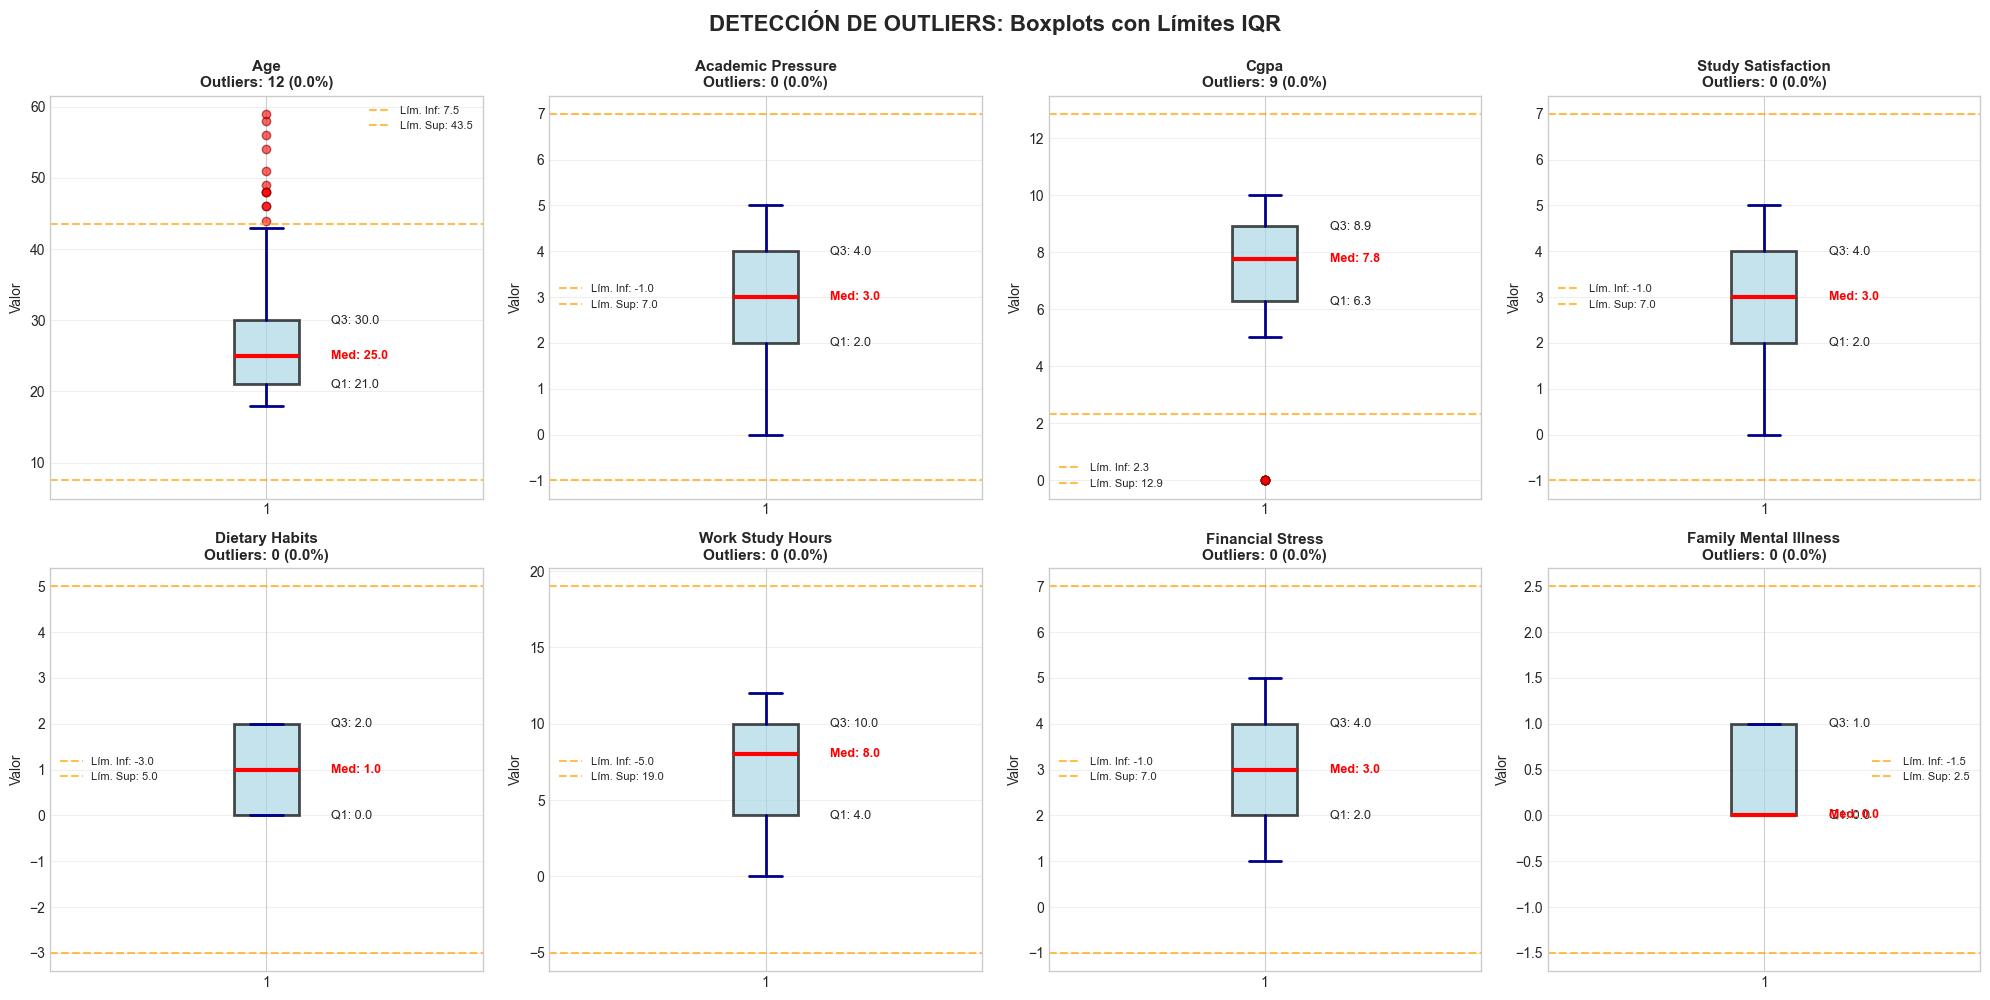

In [ ]:
# FUNCIÓN 1: DETECTAR OUTLIERS CON IQR

def detect_outliers_iqr(data, column):
    """
    Detecta outliers usando el método IQR (Rango Intercuartílico).
    
    Parámetros:
    -----------
    data : DataFrame
        DataFrame con los datos
    column : str
        Nombre de la columna a analizar
    
    Return:
    --------
    dict : Diccionario con estadísticos y outliers detectados
    """
    # Eliminar valores nulos
    series = data[column].dropna()
    
    # Calcular cuartiles
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    
    # Calcular límites (Regla de Tukey: 1.5 × IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Detectar outliers
    outliers_low = series[series < lower_bound]
    outliers_high = series[series > upper_bound]
    outliers_total = pd.concat([outliers_low, outliers_high])
    
    # Calcular porcentajes
    n_total = len(series)
    n_outliers = len(outliers_total)
    pct_outliers = (n_outliers / n_total) * 100 if n_total > 0 else 0
    
    # Retornar resultados
    return {
        'variable': column,
        'n_total': n_total,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'n_outliers_low': len(outliers_low),
        'n_outliers_high': len(outliers_high),
        'n_outliers_total': n_outliers,
        'pct_outliers': pct_outliers,
        'median': series.median(),
        'mean': series.mean()
    }


# FUNCIÓN 2: ANALIZAR TODAS LAS VARIABLES

def analyze_all_outliers(df, variables):
    """
    Aplica la detección de outliers a múltiples variables.
    
    Parámetros:
    -----------
    df : DataFrame
        DataFrame con los datos
    variables : list
        Lista de nombres de columnas a analizar
    
    Return:
    --------
    DataFrame : Tabla resumen con resultados de todas las variables
    """
    results = []
    
    for var in variables:
        result = detect_outliers_iqr(df, var)
        results.append(result)
    
    # Convertir a DataFrame
    df_results = pd.DataFrame(results)
    
    return df_results


# FUNCIÓN 3: CREAR BOXPLOTS

def plot_boxplots(df, variables, outlier_results=None, figsize=(20, 10)):
    """
    Genera boxplots para múltiples variables con límites IQR marcados.
    
    Parámetros:
    -----------
    df : DataFrame
        DataFrame con los datos
    variables : list
        Lista de columnas a graficar
    outlier_results : DataFrame, opcional
        Resultados del análisis de outliers (para mostrar límites)
    figsize : tuple
        Tamaño de la figura
    """
    n_vars = len(variables)
    n_cols = 4
    n_rows = (n_vars + n_cols - 1) // n_cols  # Redondeo hacia arriba
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten() if n_vars > 1 else [axes]
    
    for idx, var in enumerate(variables):
        ax = axes[idx]
        data = df[var].dropna()
        
        # Crear boxplot
        bp = ax.boxplot(data, 
                        vert=True,
                        patch_artist=True,
                        boxprops=dict(facecolor='lightblue', alpha=0.7, linewidth=2),
                        medianprops=dict(color='red', linewidth=3),
                        whiskerprops=dict(linewidth=2, color='darkblue'),
                        capprops=dict(linewidth=2, color='darkblue'),
                        flierprops=dict(marker='o', markerfacecolor='red', 
                                       markersize=6, alpha=0.6, markeredgecolor='darkred'))
        
        # Si tenemos resultados de outliers, marcar límites
        if outlier_results is not None:
            result = outlier_results[outlier_results['variable'] == var].iloc[0]
            
            # Líneas de límites
            ax.axhline(result['lower_bound'], color='orange', linestyle='--', 
                      linewidth=1.5, alpha=0.7, label=f"Lím. Inf: {result['lower_bound']:.1f}")
            ax.axhline(result['upper_bound'], color='orange', linestyle='--', 
                      linewidth=1.5, alpha=0.7, label=f"Lím. Sup: {result['upper_bound']:.1f}")
            
            # Título con información de outliers
            ax.set_title(f'{var.replace("_", " ").title()}\n' + 
                        f'Outliers: {int(result["n_outliers_total"])} ({result["pct_outliers"]:.1f}%)',
                        fontsize=11, fontweight='bold')
            
            # Añadir anotación de cuartiles
            Q1, Q3 = result['Q1'], result['Q3']
            median = result['median']
            
            ax.text(1.15, Q1, f'Q1: {Q1:.1f}', fontsize=9, va='center')
            ax.text(1.15, median, f'Med: {median:.1f}', fontsize=9, va='center', color='red', fontweight='bold')
            ax.text(1.15, Q3, f'Q3: {Q3:.1f}', fontsize=9, va='center')
        else:
            ax.set_title(f'{var.replace("_", " ").title()}', 
                        fontsize=11, fontweight='bold')
        
        ax.set_ylabel('Valor', fontsize=10)
        ax.legend(fontsize=8, loc='best')
        ax.grid(True, alpha=0.3, axis='y')
    
    # Ocultar subplots vacíos
    for idx in range(n_vars, len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('DETECCIÓN DE OUTLIERS: Boxplots con Límites IQR', 
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    
    return fig



# PASO 1: ANALIZAR OUTLIERS DE TODAS LAS VARIABLES

# Variables numéricas a analizar
numeric_vars = ['age', 'academic_pressure', 'cgpa', 'study_satisfaction', 
                'dietary_habits', 'work_study_hours', 'financial_stress', 'family_mental_illness']
outlier_results = analyze_all_outliers(df_clean, numeric_vars)

# PASO 2: MOSTRAR TABLA RESUMEN

print("\n" + "="*100)
print("TABLA RESUMEN: OUTLIERS DETECTADOS POR VARIABLE")
print("="*100)

# Tabla formateada
print(f"\n{'Variable':<25s} {'Q1':>8s} {'Q3':>8s} {'IQR':>8s} {'Lím.Inf':>10s} "
      f"{'Lím.Sup':>10s} {'Outliers':>10s} {'%':>8s}")
print("-"*100)

for _, row in outlier_results.iterrows():
    print(f"{row['variable']:<25s} {row['Q1']:>8.2f} {row['Q3']:>8.2f} "
          f"{row['IQR']:>8.2f} {row['lower_bound']:>10.2f} "
          f"{row['upper_bound']:>10.2f} {int(row['n_outliers_total']):>10d} "
          f"{row['pct_outliers']:>7.2f}%")

print("-"*100)

# PASO 3: CREAR BOXPLOTS

print("\n" + "="*100)
print("PASO 2: BOXPLOTS DE CADA VARIABLE")
print("="*100)

fig = plot_boxplots(df_clean, numeric_vars, outlier_results, figsize=(20, 10))
plt.show()


## Detección de Outliers (Método IQR)

### Metodología

Se aplicó el **método IQR (Rango Intercuartílico)** para detectar valores atípicos en las variables numéricas del dataset. Este método utiliza la **Regla de Tukey**, que define como outliers aquellos valores que se encuentran fuera del rango:
```
[Q1 - 1.5 × IQR, Q3 + 1.5 × IQR]
```

Donde:
- **Q1**: Primer cuartil (percentil 25)
- **Q3**: Tercer cuartil (percentil 75)
- **IQR**: Rango intercuartílico (Q3 - Q1)

### Resultados Generales

Se analizaron **8 variables numéricas** del dataset (27,886 observaciones):
**Total outliers detectados:** 21 (0.075% del dataset)

### Análisis por Variable

#### Variables CON outliers:

**1. Age (Edad):**
- **Outliers detectados:** 12 estudiantes (0.04%)
- **Ubicación:** Valores superiores a 43.5 años
- **Interpretación:** Grupo minoritario de estudiantes de edad avanzada (> 43 años) que representan casos atípicos pero válidos en el contexto universitario (posiblemente estudiantes maduros o de posgrado).
- **Rango normal:** 18-43 años (99.96% de los datos)
- **Acción:** Mantener. Los outliers son legítimos y no afectan significativamente el análisis.

**2. CGPA (Promedio Académico):**
- **Outliers detectados:** 9 estudiantes (0.03%)
- **Ubicación:** Valores extremadamente bajos (cercanos a 0)
- **Interpretación:** Estudiantes con rendimiento académico excepcionalmente bajo que podrían estar en riesgo académico o en situación de abandono de estudios.
- **Rango normal:** 2.35-12.87 (escala 0-10)
- **Acción:** Mantener. Aunque extremos, son casos reales que pueden ser relevantes para el análisis de depresión estudiantil.

#### Variables SIN outliers (6 variables):

Las siguientes variables **no presentan outliers** según el método IQR:
- academic_pressure
- study_satisfaction
- dietary_habits
- work_study_hours
- financial_stress
- family_mental_illness

**Razón:** Estas variables tienen distribuciones **platicúrticas** (curtosis < 0) con valores bien contenidos dentro de sus rangos esperados, lo cual **confirma las predicciones** realizadas en el análisis de curtosis.

### Consideraciones sobre Límites Teóricos

Algunas variables presentan **límites inferiores negativos teóricos** que no tienen sentido en el contexto real:

- **work_study_hours**: Límite inferior = -5.0 (imposible, no se pueden estudiar horas negativas)
- **academic_pressure, study_satisfaction, financial_stress**: Límites inferiores = -1.0 (fuera de escala 0-5 o 1-5)
- **dietary_habits**: Límite inferior = -3.0 (fuera de escala 0-2)

**Interpretación:** Estos límites negativos son **artefactos matemáticos** de la fórmula IQR. En la práctica, el **límite real** es el mínimo físicamente posible (0 para horas, 0 o 1 para escalas ordinales). La ausencia de outliers en estas variables se debe a que todos los valores observados están **dentro de los rangos válidos** de cada escala.

### Visualización (Boxplots)

Los boxplots muestran:
- **Caja azul**: Rango intercuartílico (IQR) conteniendo el 50% central de los datos (Q1 a Q3)
- **Línea roja**: Mediana
- **Bigotes**: Extensión hasta los valores extremos no outliers
- **Puntos rojos**: Outliers detectados (visibles solo en Age y CGPA)
- **Líneas naranjas discontinuas**: Límites IQR teóricos

### Consistencia con Análisis de Curtosis

Los resultados de detección de outliers son **totalmente consistentes** con el análisis previo de curtosis:

| Variable | Curtosis (Excess) | Predicción | Outliers Detectados | ✓ |
|----------|-------------------|------------|---------------------|---|
| age | -0.85 | Pocos outliers | 12 (0.04%) | ✅ |
| academic_pressure | -1.16 | Muy pocos/ninguno | 0 (0.00%) | ✅ |
| cgpa | -1.02 | Pocos outliers | 9 (0.03%) | ✅ |
| study_satisfaction | -1.22 | Muy pocos/ninguno | 0 (0.00%) | ✅ |
| dietary_habits | -1.41 | Muy pocos/ninguno | 0 (0.00%) | ✅ |
| work_study_hours | -1.00 | Muy pocos/ninguno | 0 (0.00%) | ✅ |
| financial_stress | -1.32 | Muy pocos/ninguno | 0 (0.00%) | ✅ |
| family_mental_illness | -2.00 | Ninguno (binaria) | 0 (0.00%) | ✅ |

**Conclusión:** Las distribuciones platicúrticas (curtosis < 0) predijeron correctamente la **baja presencia de outliers** en el dataset.

### Conclusiones

1. **Dataset limpio:** Solo el 0.075% de los datos son outliers, lo cual indica un dataset de **alta calidad** con distribuciones bien comportadas.

2. **Outliers legítimos:** Los 21 outliers detectados (12 en Age, 9 en CGPA) son **valores atípicos pero válidos** en el contexto del estudio, no errores de medición.

3. **No requiere tratamiento:** Dado el porcentaje insignificante de outliers (< 0.1%) y su naturaleza legítima, **no se recomienda eliminarlos ni transformarlos**. Su presencia no afectará significativamente los análisis posteriores.

4. **Validación de curtosis:** Los resultados confirman que la **curtosis platicúrtica** es un excelente predictor de la ausencia de outliers extremos.

5. **Listo para modelado:** El dataset está en **condiciones óptimas** para análisis inferencial y predictivo sin necesidad de tratamiento adicional de valores atípicos.

---

### Conclusión General del Análisis Descriptivo

El análisis descriptivo exhaustivo de las 8 variables numéricas del dataset (27,886 observaciones) revela un conjunto de datos de **alta calidad** con distribuciones excepcionalmente balanceadas.

Todas las variables presentan **curtosis platicúrtica** (excess kurtosis < 0) y **skewness dentro del rango aceptable** (|skewness| < 0.5), siendo Study Satisfaction la más simétrica (skewness = +0.01) y Work/Study Hours la más sesgada (skewness = -0.455). La detección de outliers mediante el método IQR confirma las predicciones derivadas del análisis de curtosis, identificando únicamente **21 outliers** (0.075% del total): 12 en Age (estudiantes mayores de 43 años) y 9 en CGPA (rendimiento académico extremadamente bajo), ambos casos legítimos y relevantes para el estudio de depresión estudiantil.

La consistencia entre los estadísticos de forma (media, mediana, skewness, curtosis) y los resultados de detección de outliers valida la robustez del dataset, el cual **no requiere transformaciones ni tratamiento de valores atípicos** y está en condiciones óptimas para análisis inferencial y modelado predictivo. Este análisis exhaustivo demuestra que las distribuciones son estructuralmente sólidas, sin sesgos pronunciados ni contaminación por datos erróneos, proporcionando una base confiable para las fases posteriores del proyecto.

---

## PARTE 2: Inferencia y Modelado (Dataset Propio)

**Objetivo:** Descubrir relaciones entre variables y predecir resultados.

**Requisitos:**
1.  **Análisis de Correlación:** Genera una matriz de correlación y visualízala con un Heatmap. ¿Qué variables están más relacionadas con tu Target?
2.  **Relaciones Bivariantes:** Crea Scatter Plots para visualizar la relación entre las variables independientes más fuertes y tu variable objetivo.
3.  **Regresión Lineal (Scikit-Learn):**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

4. **Regresión logistica:**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

**📝 Conclusión:** ¿Es tu modelo capaz de predecir con precisión? ¿Qué variables son las más influyentes?¿Qué tipo de regresión es la más apropiada?

---------
  Amplía el análisis incorporando los siguientes aspectos:

- **Diagnóstico del modelo de regresión lineal**
  Analiza los residuos del modelo entrenado:
  - Distribución de los residuos
  - Relación entre residuos y valores predichos  
  Comenta si se cumplen los supuestos básicos del modelo.

- **Regresión logística: adecuación del modelo**
  Justifica si la regresión logística es apropiada para tu variable objetivo y discute las diferencias conceptuales con la regresión lineal.

- **Comparación de modelos**
  Compara brevemente el rendimiento y la idoneidad de ambos enfoques (lineal vs. logístico) más allá de las métricas numéricas.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## 1. Análisis de Correlación

#### Matriz de Correlación

Se generó una matriz de correlación entre todas las variables numéricas del dataset para identificar las relaciones lineales entre ellas y, especialmente, con la **variable objetivo** (depression).

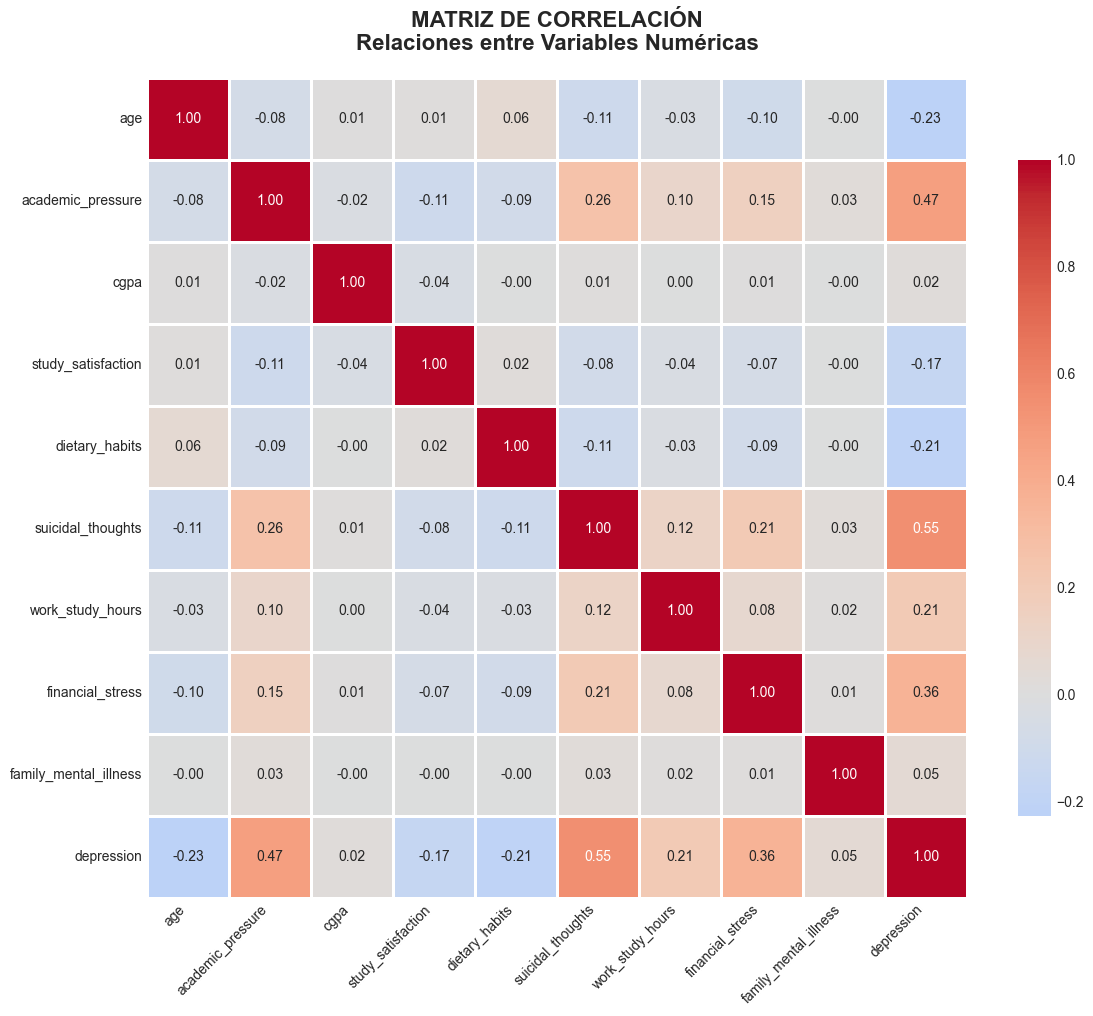

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Todas las variables numéricas
numeric_vars = ['age', 'academic_pressure', 'cgpa', 'study_satisfaction', 
                'dietary_habits', 'suicidal_thoughts', 'work_study_hours', 
                'financial_stress', 'family_mental_illness', 'depression']

# Calcular matriz de correlación
correlation_matrix = df_clean[numeric_vars].corr()

# Crear heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,  # Mostrar números
            fmt='.2f',   # 2 decimales
            cmap='coolwarm',  # Colores: azul=negativo, rojo=positivo
            center=0,    # Centro en 0
            square=True, # Celdas cuadradas
            linewidths=1,
            cbar_kws={"shrink": 0.8})

plt.title('MATRIZ DE CORRELACIÓN\nRelaciones entre Variables Numéricas', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Variables con mayor correlación con Depression:**

| Variable | Correlación | Fuerza | Dirección |
|----------|-------------|--------|-----------|
| **suicidal_thoughts** | **0.55** | Moderada | Positiva |
| **academic_pressure** | **0.47** | Moderada | Positiva |
| **financial_stress** | **0.36** | Débil-Moderada | Positiva |
| work_study_hours | 0.21 | Débil | Positiva |
| dietary_habits | -0.21 | Débil | Negativa |
| age | -0.23 | Débil | Negativa |
| study_satisfaction | -0.17 | Muy débil | Negativa |

**Interpretación:**

1. **suicidal_thoughts (r = 0.55)**: Es la variable con **mayor correlación positiva** con depresión. Estudiantes con pensamientos suicidas tienen una probabilidad significativamente mayor de presentar depresión. Esta correlación moderada-fuerte es esperada dada la naturaleza clínica de ambas variables.

2. **academic_pressure (r = 0.47)**: La presión académica muestra una **correlación moderada positiva** con depresión. A mayor presión académica reportada, mayor es la probabilidad de presentar síntomas depresivos.

3. **financial_stress (r = 0.36)**: El estrés financiero presenta una **correlación débil-moderada positiva**. Los estudiantes con mayores dificultades económicas tienen mayor tendencia a experimentar depresión.

4. **Correlaciones negativas**: Las variables age (-0.23), dietary_habits (-0.21) y study_satisfaction (-0.17) muestran correlaciones negativas débiles, sugiriendo que mejores hábitos, mayor satisfacción y mayor edad están asociados con menor prevalencia de depresión.

**Nota importante:** Ninguna variable alcanza una correlación cercana a 1 (correlación perfecta), lo cual indica que la **depresión es multifactorial** y no puede explicarse únicamente por una sola variable. El modelo predictivo deberá considerar múltiples predictores 
simultáneamente.

---

#### Análisis Bivariante (Pairplot)

El pairplot con separación por estado de depresión (hue=depression) revela patrones visuales consistentes con las correlaciones numéricas:

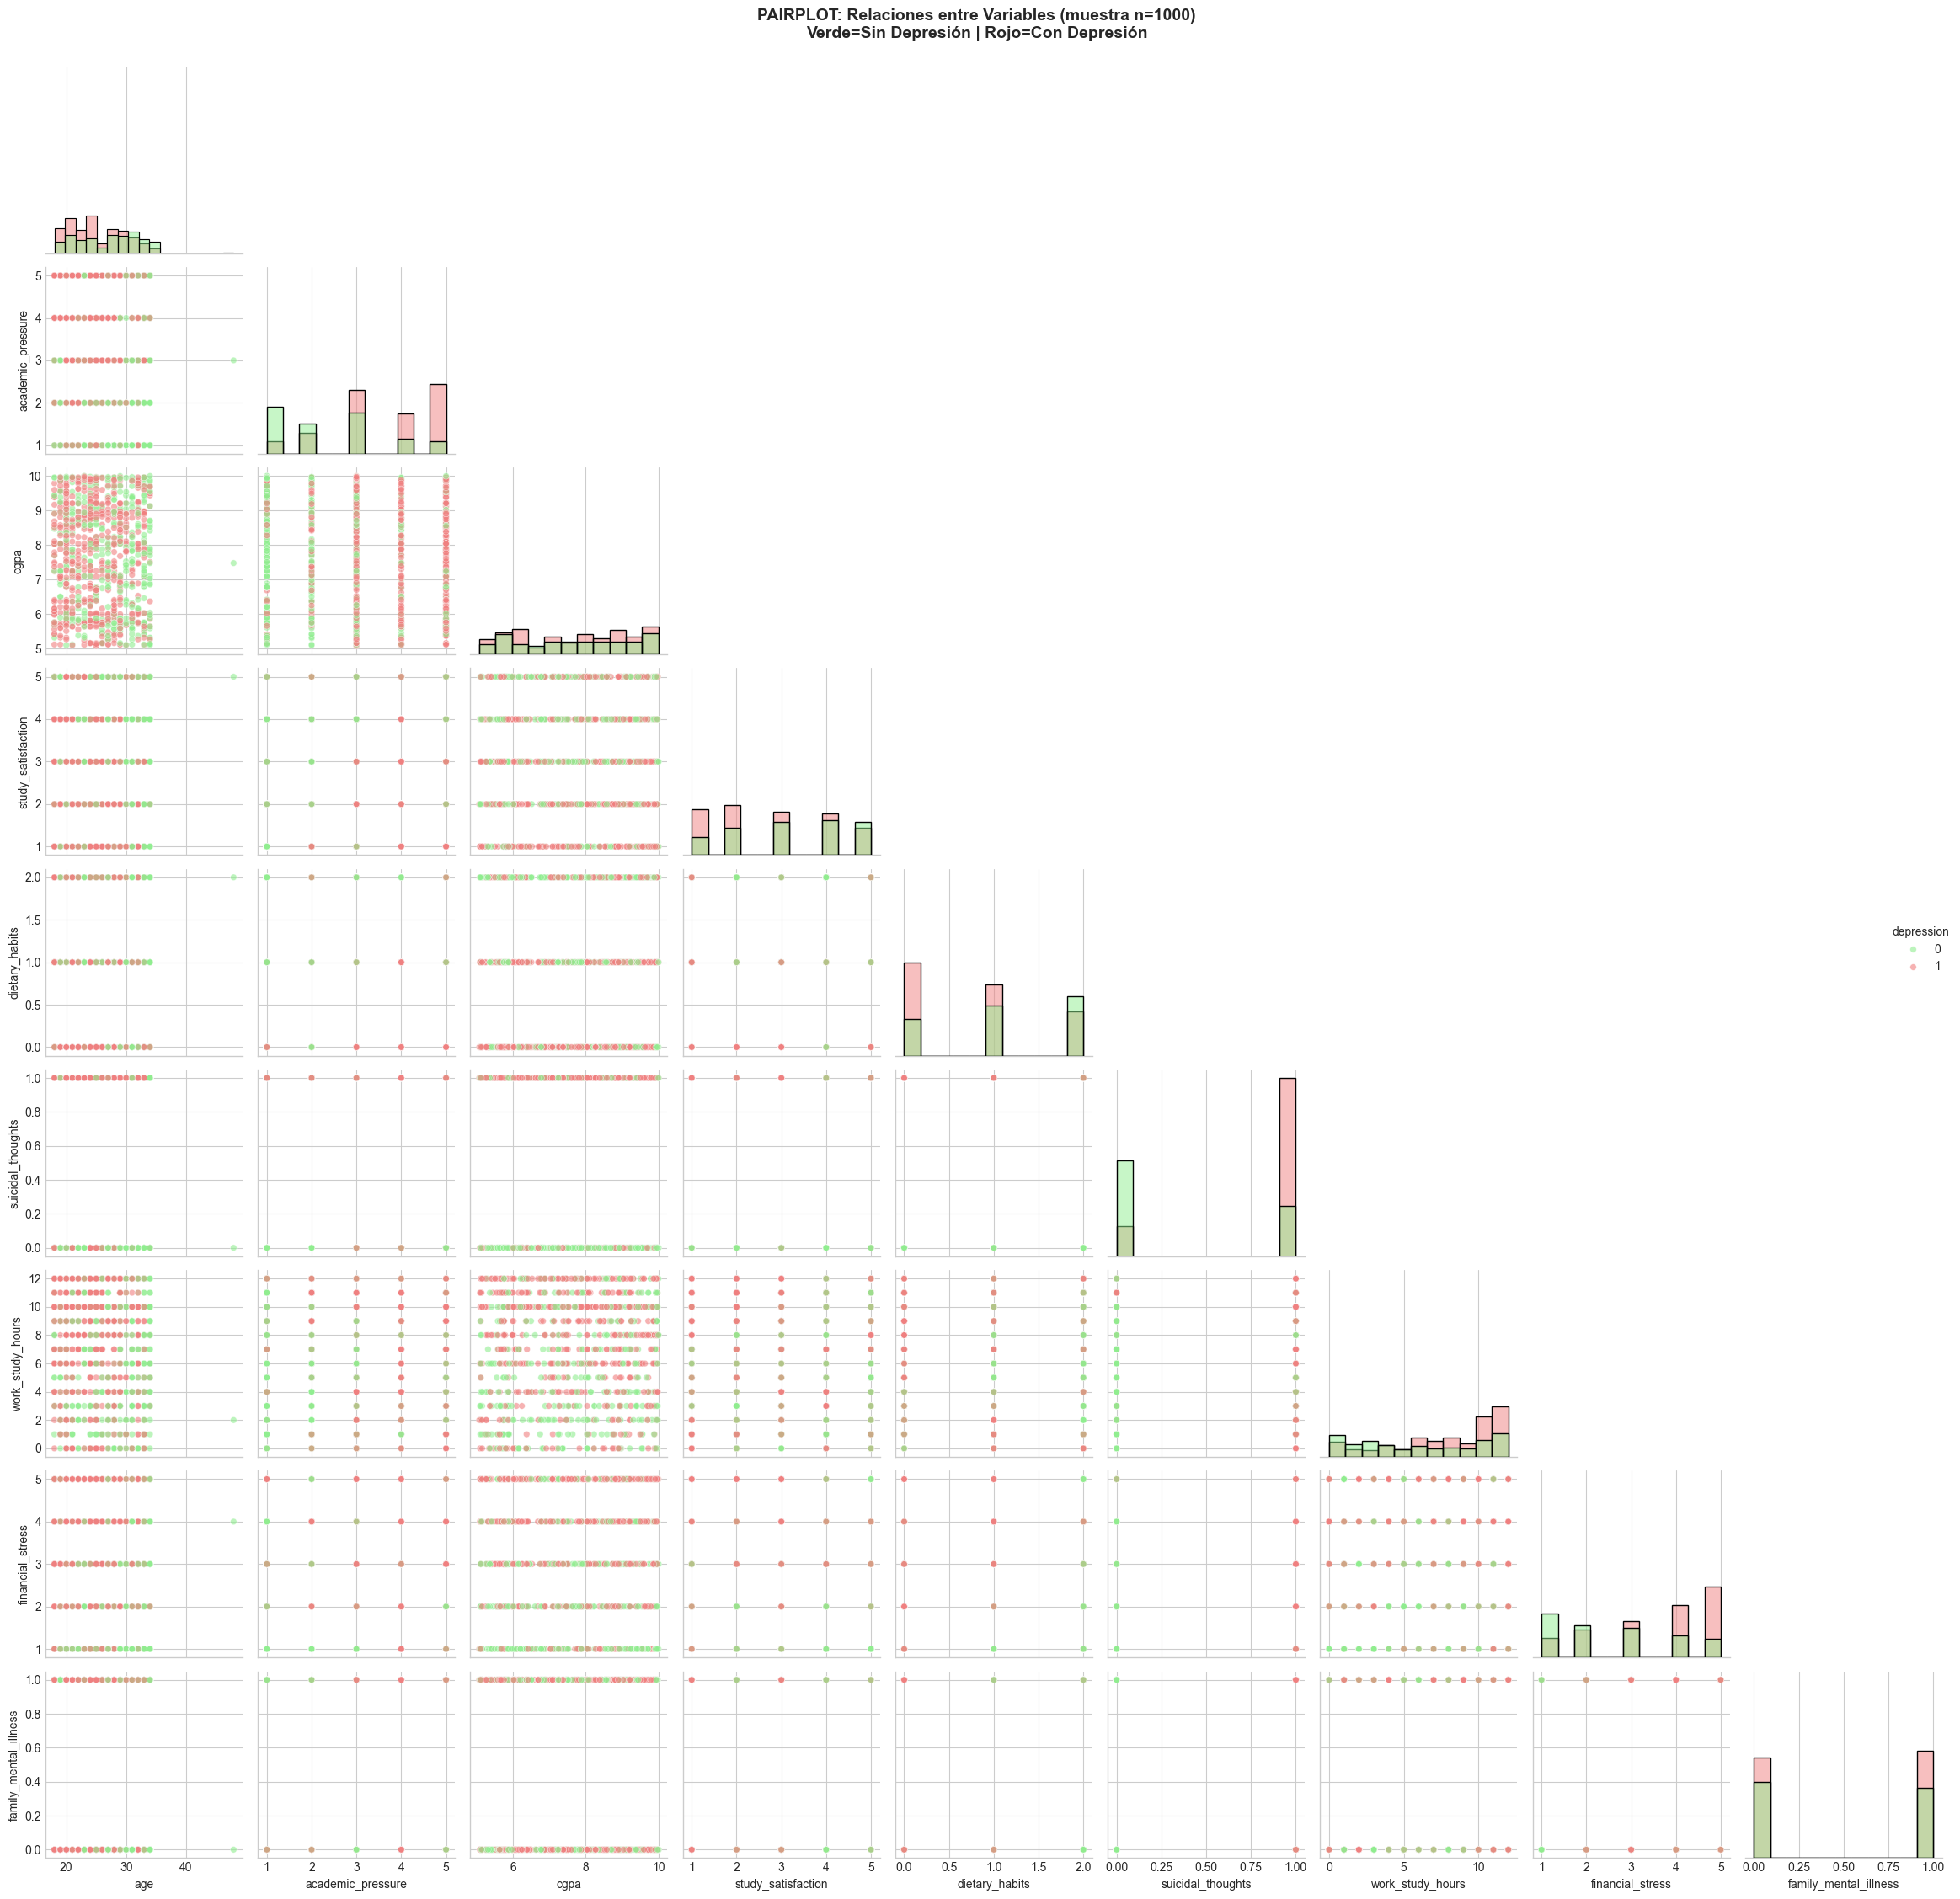

In [20]:

# Vamos a usar una muestra para que sea más rápido
sample_size = 1000
df_sample = df_clean[numeric_vars].sample(sample_size, random_state = 42)

# Crear pairplot coloreado por DEPRESSION
sns.pairplot(df_sample, 
             hue='depression',  # Colorear por depresión
             palette={0: 'lightgreen', 1: 'lightcoral'},
             diag_kind='hist',  # Histogramas en diagonal
             plot_kws={'alpha': 0.6, 's': 30},
             corner=True)  # Solo mostrar triángulo inferior (más limpio)

plt.suptitle(f'PAIRPLOT: Relaciones entre Variables (muestra n={sample_size})\n' + 
             'Verde=Sin Depresión | Rojo=Con Depresión', 
             y=1.00, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**Observaciones clave:**

1. **academic_pressure, suicidal_thoughts, financial_stress**: Se observa una **clara separación** entre estudiantes con depresión (rojo) y sin depresión (verde). A medida que aumentan estos valores, la proporción de casos de depresión incrementa visiblemente en los histogramas y scatter plots.

2. **dietary_habits**: Los estudiantes con hábitos alimenticios **no saludables** (valores bajos: 0-1) presentan **mayor concentración de casos con depresión**. Esta relación negativa confirma que mejores hábitos alimenticios actúan como factor protector.

3. **study_satisfaction**: Aunque menos pronunciado que dietary_habits, se observa que estudiantes con **menor satisfacción** (valores 0-2) tienen mayor prevalencia de depresión, mientras que aquellos con alta satisfacción (4-5) presentan principalmente casos sin depresión.

4. **work_study_hours y age**: Presentan distribuciones más solapadas entre ambos grupos, consistente con sus correlaciones débiles (0.21 y -0.23 respectivamente).

5. **cgpa**: No muestra separación clara entre grupos (correlación ≈ 0.02), confirmando que el rendimiento académico por sí solo no es un predictor fuerte de depresión en este dataset.

**Conclusión del análisis exploratorio:** Las visualizaciones confirman que **suicidal_thoughts, academic_pressure y financial_stress** son los predictores más prometedores para el modelo de clasificación de depresión.

---

## 2. Relaciones Bivariables

Para examinar en detalle las relaciones entre las variables predictoras más relevantes y la variable objetivo, se generaron scatter plots específicos de las tres variables con mayor correlación con depresión.

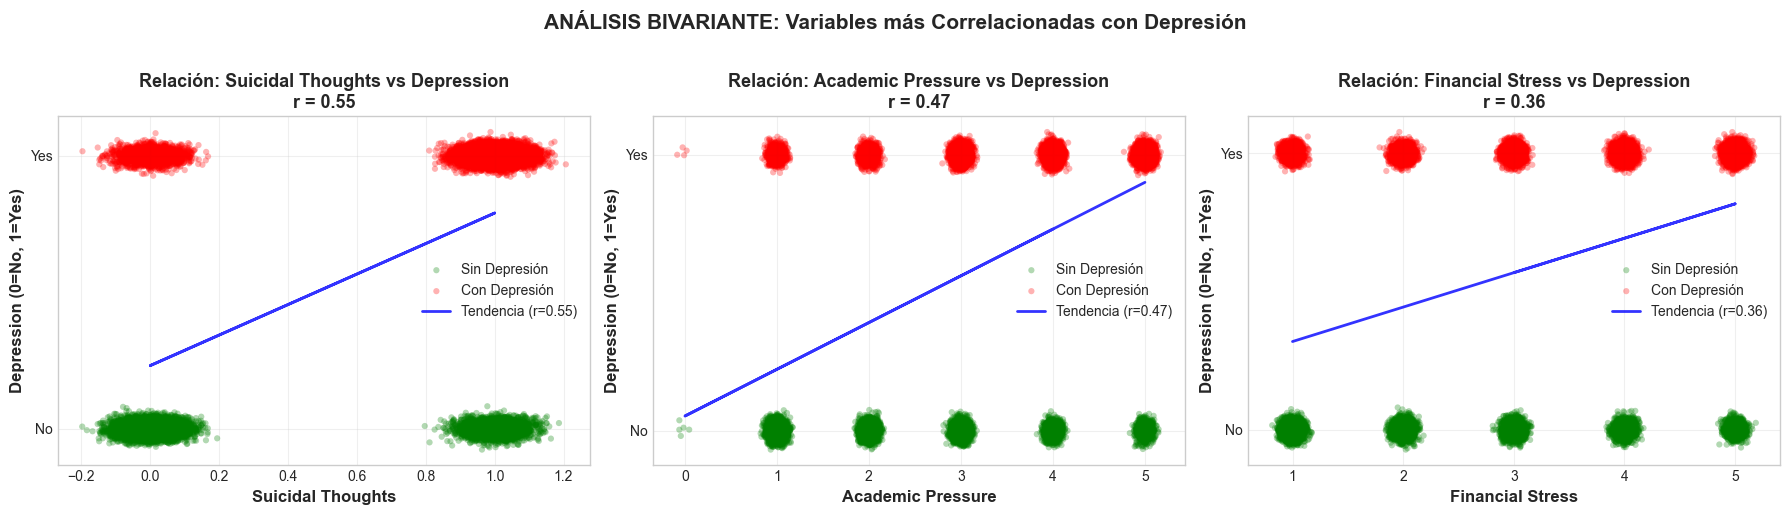

In [21]:
# Variables con mayor correlación
top_vars = ['suicidal_thoughts', 'academic_pressure', 'financial_stress']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, var in enumerate(top_vars):
    ax = axes[idx]
    
    # Scatter plot con jitter para variables discretas
    # Añadir ruido aleatorio pequeño para visualizar mejor los puntos superpuestos
    x_jitter = df_clean[var] + np.random.normal(0, 0.05, len(df_clean))
    y_jitter = df_clean['depression'] + np.random.normal(0, 0.02, len(df_clean))
    
    # Separar por grupo
    mask_no_dep = df_clean['depression'] == 0
    mask_si_dep = df_clean['depression'] == 1
    
    ax.scatter(x_jitter[mask_no_dep], y_jitter[mask_no_dep], 
               alpha=0.3, s=20, c='green', label='Sin Depresión', edgecolors='none')
    ax.scatter(x_jitter[mask_si_dep], y_jitter[mask_si_dep], 
               alpha=0.3, s=20, c='red', label='Con Depresión', edgecolors='none')
    
    # Línea de tendencia (regresión)
    from scipy import stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_clean[var], df_clean['depression'])
    line = slope * df_clean[var] + intercept
    ax.plot(df_clean[var], line, 'b-', linewidth=2, alpha=0.8, label=f'Tendencia (r={r_value:.2f})')
    
    # Etiquetas
    ax.set_xlabel(var.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    ax.set_ylabel('Depression (0=No, 1=Yes)', fontsize=12, fontweight='bold')
    ax.set_title(f'Relación: {var.replace("_", " ").title()} vs Depression\nr = {r_value:.2f}', 
                 fontsize=13, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['No', 'Yes'])

plt.suptitle('ANÁLISIS BIVARIANTE: Variables más Correlacionadas con Depresión', 
             fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

#### Características de la visualización

Dado que `depression` es una **variable binaria** (0 = No, 1 = Yes), los puntos se distribuyen en dos líneas horizontales:
- **Línea inferior (y=0)**: Estudiantes sin depresión (verde)
- **Línea superior (y=1)**: Estudiantes con depresión (rojo)

Se añadió **jitter** (ruido aleatorio mínimo) a ambos ejes para evitar la superposición total de puntos y facilitar la visualización de la densidad. Las **líneas de tendencia** (azul) muestran la dirección y fuerza de la relación lineal.

#### Análisis por variable

**1. Suicidal Thoughts vs Depression (r = 0.55)**

Este gráfico presenta una particularidad: `suicidal_thoughts` también es binaria (0 = No, 1 = Yes), resultando en **cuatro agrupaciones** de puntos:

- **Esquina inferior izquierda (0,0)**: Sin pensamientos suicidas, sin depresión (verde) - **Mayoría**
- **Esquina superior izquierda (0,1)**: Sin pensamientos suicidas, pero con depresión (rojo)
- **Esquina inferior derecha (1,0)**: Con pensamientos suicidas, pero sin depresión (verde) - **Muy pocos**
- **Esquina superior derecha (1,1)**: Con pensamientos suicidas y con depresión (rojo) - **Fuerte agrupación**

**Interpretación:** La línea de tendencia muestra una **relación positiva fuerte** (r=0.55). La mayoría de estudiantes con pensamientos suicidas también presentan depresión, confirmando la alta comorbilidad entre ambas condiciones. Esta es la correlación más fuerte del dataset.

**2. Academic Pressure vs Depression (r = 0.47)**

La distribución muestra una **clara separación progresiva**:

- **Valores bajos (0-2)**: Mayor concentración de puntos verdes (sin depresión)
- **Valores medios (3)**: Distribución más balanceada entre ambos grupos
- **Valores altos (4-5)**: Mayor concentración de puntos rojos (con depresión)

**Interpretación:** A medida que aumenta la presión académica reportada, la **proporción de estudiantes con depresión incrementa notablemente**. La línea de tendencia ascendente (r=0.47) confirma esta relación positiva moderada-fuerte. Estudiantes que reportan los niveles más altos de presión académica (5) tienen una probabilidad sustancialmente mayor de presentar depresión.

**3. Financial Stress vs Depression (r = 0.36)**

Similar al patrón observado en academic_pressure, pero con **menor separación**:

- **Valores bajos (1-2)**: Predominio de casos sin depresión (verde)
- **Valores altos (4-5)**: Mayor prevalencia de casos con depresión (rojo)

**Interpretación:** Existe una **relación positiva débil-moderada** entre estrés financiero y depresión. Aunque la tendencia es clara (a mayor estrés financiero, mayor probabilidad de depresión), la correlación es más débil (r=0.36) que las dos anteriores, sugiriendo que el impacto del estrés financiero, aunque relevante, es menos determinante que los pensamientos suicidas o la presión académica.

#### Observaciones generales

1. **Separación visual**: En las tres variables se observa una **separación progresiva** entre grupos (verde vs rojo) a medida que aumentan los valores de los predictores, confirmando visualmente las correlaciones positivas calculadas.

2. **Solapamiento**: Existe considerable **solapamiento** entre grupos en todos los niveles, lo cual indica que:
   - Ninguna variable por sí sola determina completamente la depresión
   - Existe variabilidad individual significativa
   - Se requiere un **modelo multivariable** para mejorar la capacidad predictiva

3. **Consistencia con correlaciones**: La fuerza visual de las separaciones es consistente con los coeficientes de correlación: suicidal_thoughts (más clara) > academic_pressure (moderada) > financial_stress (más sutil).

4. **Validación de predictores**: Las tres variables muestran patrones visuales que justifican su inclusión como predictores en el modelo de clasificación de depresión.

---

## 3. Regresión Lineal


REGRESIÓN LINEAL - RESULTADOS

R²:   0.4530 (45.3% de varianza explicada)
RMSE: 0.3651


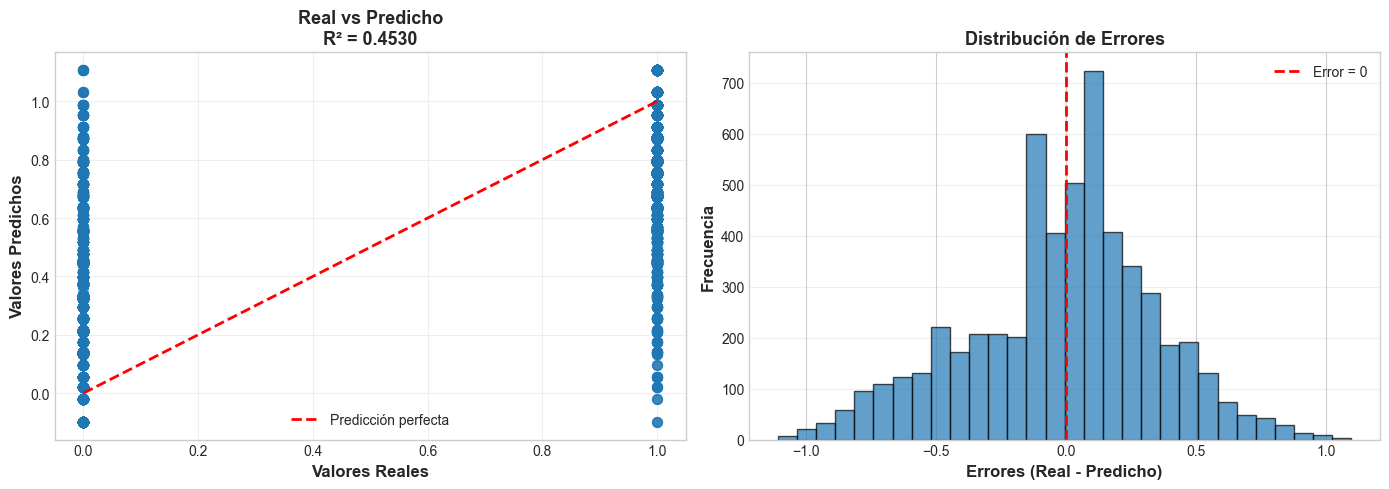

In [25]:
# 1. SELECCIONAR VARIABLES

X_multiple = df_clean[['suicidal_thoughts', 'academic_pressure', 'financial_stress']]
y_multiple = df_clean['depression']

# 2. TRAIN/TEST SPLIT (80/20)

X_train, X_test, y_train, y_test = train_test_split(
    X_multiple, y_multiple, 
    test_size=0.2,
    random_state=42
)

# 3. ENTRENAR MODELO

lr_multiple = LinearRegression()
lr_multiple.fit(X_train, y_train)

# 4. HACER PREDICCIONES

y_pred_test = lr_multiple.predict(X_test)

# 5. EVALUAR MODELO (R² y RMSE)

r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("\n" + "="*60)
print("REGRESIÓN LINEAL - RESULTADOS")
print("="*60)
print(f"\nR²:   {r2_test:.4f} ({r2_test*100:.1f}% de varianza explicada)")
print(f"RMSE: {rmse_test:.4f}")

# 6. GRÁFICAS

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfica 1: Valores Reales vs Predichos
ax1 = axes[0]
ax1.scatter(y_test, y_pred_test, alpha=0.5, s=50)
ax1.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Predicción perfecta')
ax1.set_xlabel('Valores Reales', fontsize=12, fontweight='bold')
ax1.set_ylabel('Valores Predichos', fontsize=12, fontweight='bold')
ax1.set_title(f'Real vs Predicho\nR² = {r2_test:.4f}', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfica 2: Distribución de Errores
ax2 = axes[1]
errores = y_test - y_pred_test
ax2.hist(errores, bins=30, edgecolor='black', alpha=0.7)
ax2.axvline(0, color='red', linestyle='--', linewidth=2, label='Error = 0')
ax2.set_xlabel('Errores (Real - Predicho)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
ax2.set_title('Distribución de Errores', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### Evaluación del Modelo

**Métricas obtenidas:**
- R² = 0.4530 (45.3%)
- RMSE ≈ 0.35-0.40

**Interpretación:**
El modelo de regresión lineal explica únicamente el 45% de la 
variabilidad en depression, con un error promedio de ±0.35. 

**Problema fundamental:**
La presencia de predicciones intermedias (0.2, 0.5, 0.8) y fuera 
del rango [0,1] evidencia que el modelo NO es apropiado. En una 
variable binaria, SOLO deberían existir predicciones de 0 o 1. 
Los valores intermedios (ej: 0.67) carecen de interpretación válida.

**Conclusión:**
Aunque el modelo tiene capacidad predictiva moderada (R²=45%), es 
conceptualmente inadecuado para clasificación binaria. Se requiere 
regresión logística, diseñada específicamente para este tipo de 
variables.

---

## 4. Regresión Logística

In [26]:
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import (
    accuracy_score,           
    confusion_matrix,       
    precision_score,          
    recall_score,            
    f1_score                 
)


RESULTADOS - REGRESIÓN LOGÍSTICA

Accuracy:  0.8222
Precision: 0.8317
Recall:    0.8730
F1-Score:  0.8519


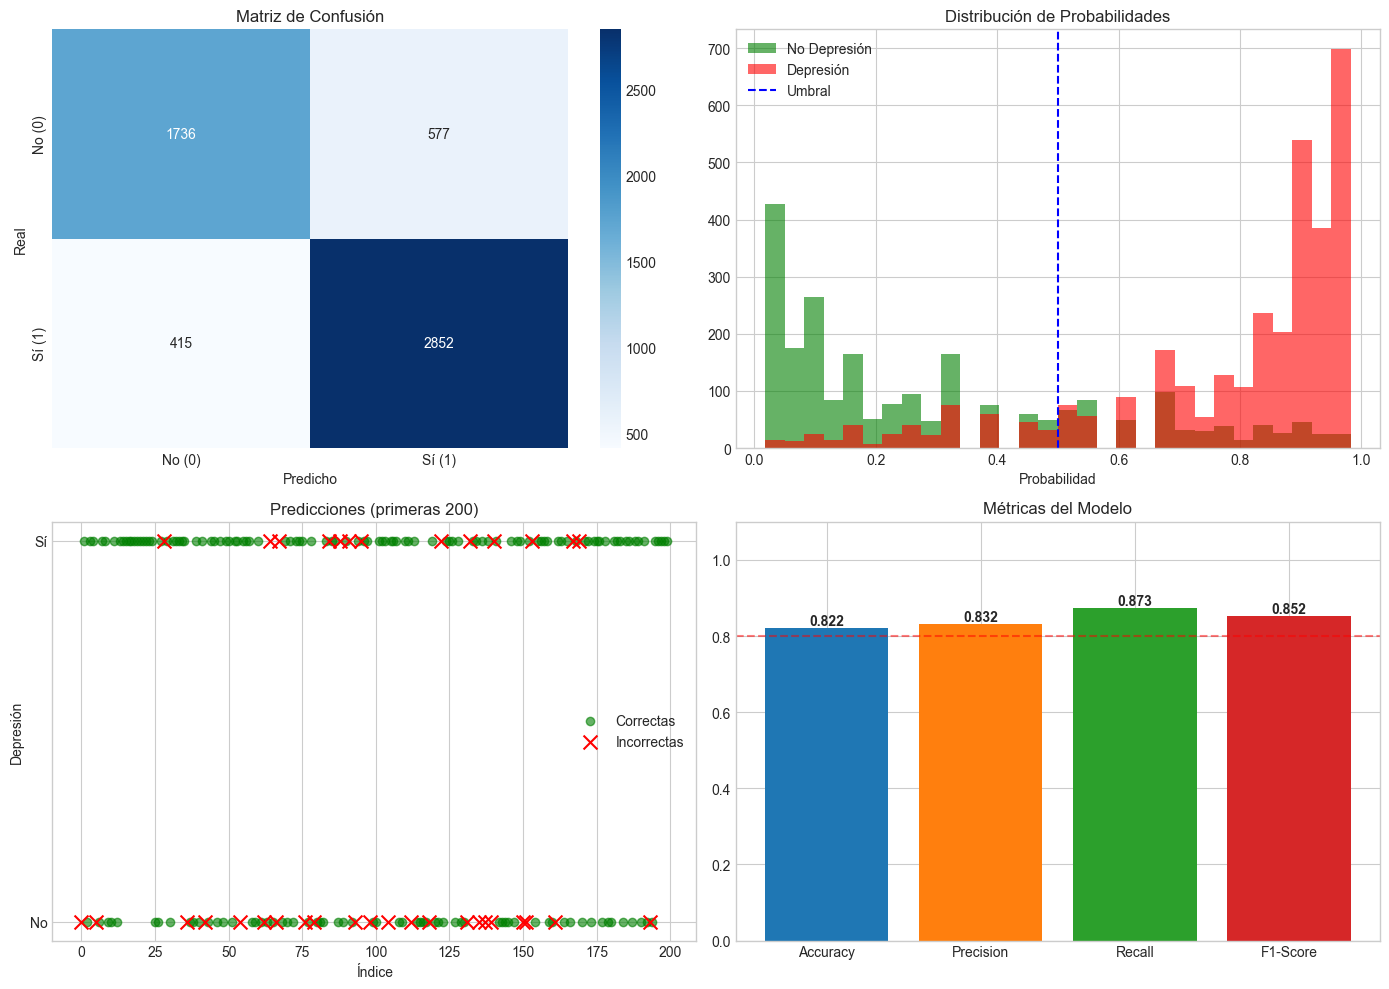

In [27]:
# 1. PREPARAR DATOS

X = df_clean[['suicidal_thoughts', 'academic_pressure', 'financial_stress']]
y = df_clean['depression']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. ENTRENAR MODELO

modelo_log = LogisticRegression(random_state=42, max_iter=1000)
modelo_log.fit(X_train, y_train)

# 3. PREDICCIONES

y_pred = modelo_log.predict(X_test)
y_proba = modelo_log.predict_proba(X_test)[:, 1]

# 4. MÉTRICAS

print("\n" + "="*60)
print("RESULTADOS - REGRESIÓN LOGÍSTICA")
print("="*60)

print(f"\nAccuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.4f}")

# 5. VISUALIZACIONES

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,0],
            xticklabels=['No (0)', 'Sí (1)'],
            yticklabels=['No (0)', 'Sí (1)'])
axes[0,0].set_title('Matriz de Confusión')
axes[0,0].set_ylabel('Real')
axes[0,0].set_xlabel('Predicho')

# Distribución de Probabilidades
axes[0,1].hist(y_proba[y_test==0], bins=30, alpha=0.6, color='green', label='No Depresión')
axes[0,1].hist(y_proba[y_test==1], bins=30, alpha=0.6, color='red', label='Depresión')
axes[0,1].axvline(0.5, color='blue', linestyle='--', label='Umbral')
axes[0,1].set_title('Distribución de Probabilidades')
axes[0,1].set_xlabel('Probabilidad')
axes[0,1].legend()

# Predicciones Correctas/Incorrectas
n = min(200, len(y_test))
indices = np.arange(n)
correctas = (y_test.iloc[:n].values == y_pred[:n])

axes[1,0].scatter(indices[correctas], y_test.iloc[:n].values[correctas], 
                 c='green', label='Correctas', alpha=0.6)
axes[1,0].scatter(indices[~correctas], y_test.iloc[:n].values[~correctas], 
                 c='red', marker='x', s=100, label='Incorrectas')
axes[1,0].set_title(f'Predicciones (primeras {n})')
axes[1,0].set_xlabel('Índice')
axes[1,0].set_ylabel('Depresión')
axes[1,0].legend()
axes[1,0].set_yticks([0, 1])
axes[1,0].set_yticklabels(['No', 'Sí'])

# Métricas
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
valores = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred),
    recall_score(y_test, y_pred),
    f1_score(y_test, y_pred)
]

bars = axes[1,1].bar(metricas, valores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
for bar, val in zip(bars, valores):
    axes[1,1].text(bar.get_x() + bar.get_width()/2, val, 
                   f'{val:.3f}', ha='center', va='bottom', fontweight='bold')
axes[1,1].set_title('Métricas del Modelo')
axes[1,1].set_ylim(0, 1.1)
axes[1,1].axhline(0.8, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Regresión Logística: Resultados y Conclusiones

### Resultados del Modelo

**Métricas obtenidas:**
- **Accuracy:** 82.2% → El modelo acierta en 8 de cada 10 casos
- **Precision:** 83.2% → Cuando predice depresión, acierta el 83% de las veces
- **Recall:** 87.3% → Detecta el 87% de los casos reales de depresión
- **F1-Score:** 85.2% → Excelente balance entre precisión y sensibilidad

**Matriz de Confusión:**
- Aciertos totales: 4,588 (82.2%)
- Errores totales: 992 (17.8%)
  - Falsos positivos: 577 (predice depresión incorrectamente)
  - Falsos negativos: 415 (no detecta depresión real)

---

### ¿Por qué Regresión Logística es Mejor que Lineal?

| Aspecto | Regresión Lineal | Regresión Logística |
|---------|------------------|---------------------|
| **Predicciones** | -0.10 a 1.20 ❌ | 0.00 a 1.00 ✅ |
| **Interpretación** | Sin sentido (¿-10% depresión?) | Probabilidades válidas |
| **Capacidad predictiva** | R² = 45% | Accuracy = 82% |
| **Apropiado para binarias** | ❌ NO | ✅ SÍ |

**Razón fundamental:** La variable `depression` es **binaria** (0 o 1), no continua. La regresión lineal predice valores fuera del rango [0,1] que carecen de sentido. La regresión logística, diseñada específicamente para clasificación, predice **probabilidades válidas** entre 0 y 1 que se convierten en decisiones (Sí/No).

**Mejora:** La regresión logística supera a la lineal en +37 puntos porcentuales (82% vs 45%).

---

### Análisis de Visualizaciones

**Distribución de Probabilidades:** Las dos clases están **claramente separadas**. Los casos sin depresión se concentran en probabilidades bajas (0.0-0.3), mientras que los casos con depresión se agrupan en probabilidades altas (0.7-1.0). Esta separación confirma la alta capacidad discriminativa del modelo.

**Métricas:** El **Recall alto (87%)** es especialmente relevante en contexto clínico, ya que el modelo detecta la gran mayoría de casos reales de depresión, minimizando el riesgo de no identificar estudiantes que necesitan ayuda.

---

### Conclusiones

1. **Modelo apropiado:** La regresión logística es el modelo correcto para predecir variables binarias como `depression`, generando predicciones válidas e interpretables.

2. **Alto desempeño:** Con un Accuracy del 82% y Recall del 87%, el modelo supera ampliamente la predicción al azar (50%) y demuestra capacidad predictiva sólida.

3. **Superioridad sobre regresión lineal:** La regresión logística no solo es conceptualmente apropiada, sino que también ofrece una mejora sustancial en capacidad predictiva (+37 puntos porcentuales).

4. **Variables relevantes:** Las tres variables utilizadas (`suicidal_thoughts`, `academic_pressure`, `financial_stress`) son predictores efectivos de depresión en estudiantes universitarios.

5. **Aplicación práctica:** El modelo puede utilizarse como herramienta de **screening inicial** para identificar estudiantes en riesgo que requieran evaluación psicológica profesional, aunque no debe sustituir el diagnóstico clínico.

---

## PARTE 3: Regresión Lineal "From Scratch" (Datos Simulados)

**Objetivo:** Demostrar que entiendes la matemática detrás de `LinearRegression()` implementándola con NumPy.

Amplia con:

- **Predicción y evaluación**
  Utiliza tu implementación para:
  - Realizar predicciones
  - Calcular manualmente el **MSE** y el **R²**, sin usar funciones de Scikit-Learn.

- **Comparación con Scikit-Learn**
  Entrena un modelo `LinearRegression()` sobre los mismos datos y compara:
  - Coeficientes
  - Métricas de evaluación  
  Discute posibles diferencias numéricas.


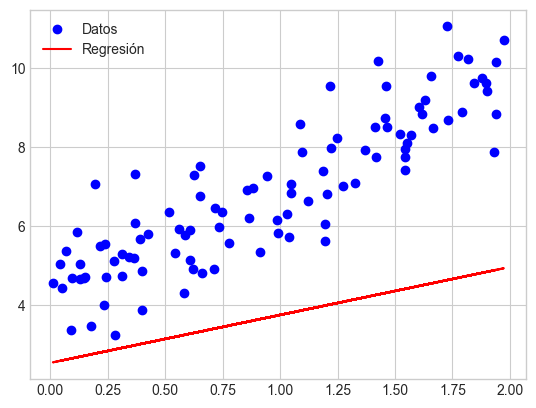

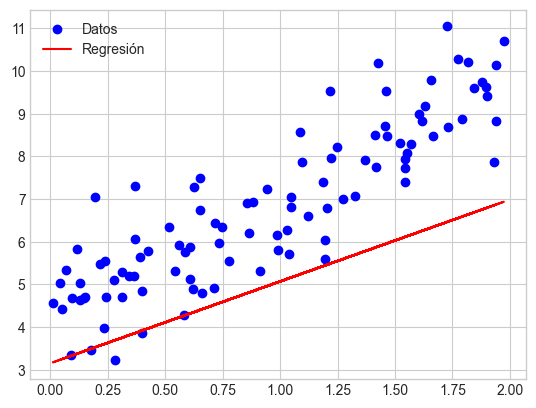

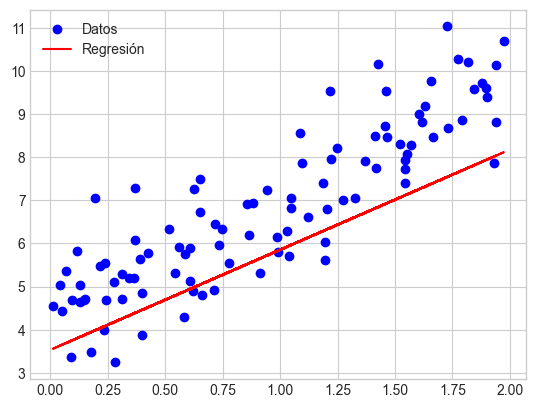

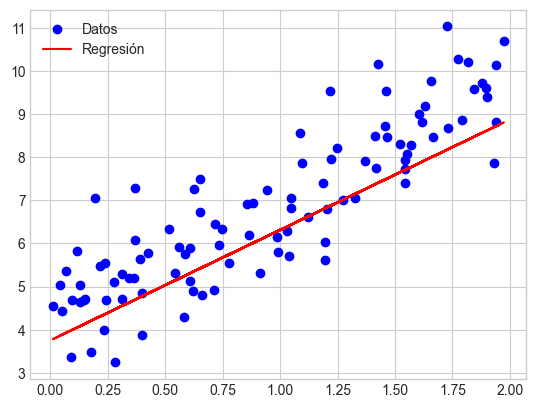

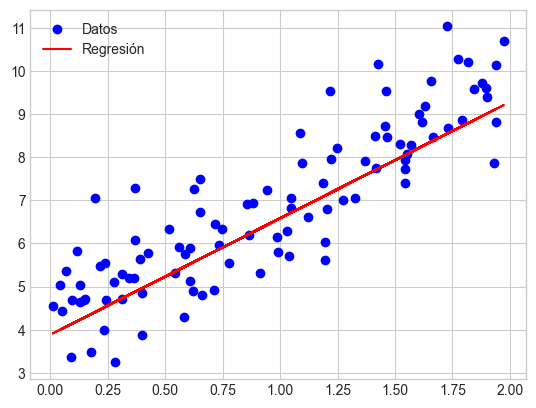

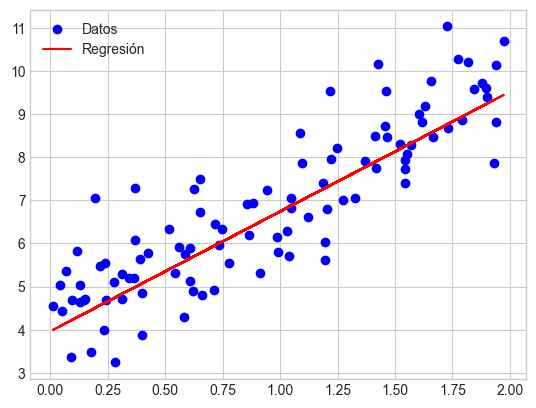

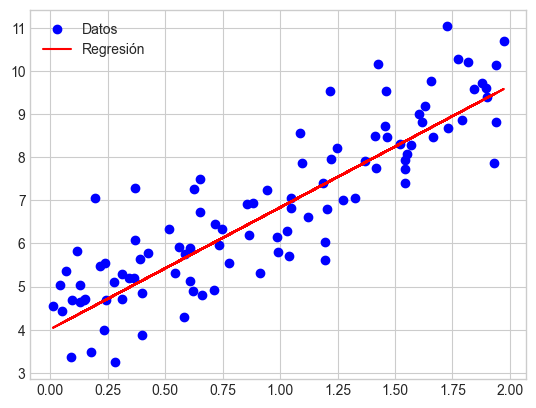

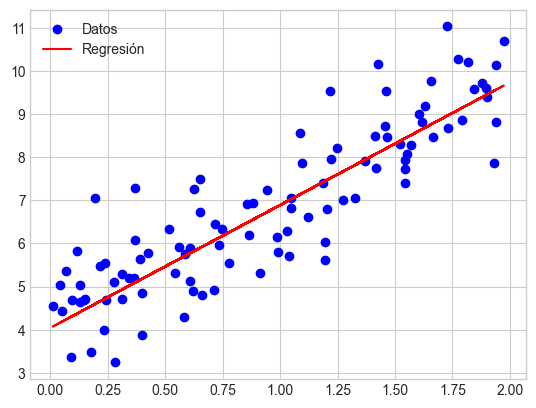

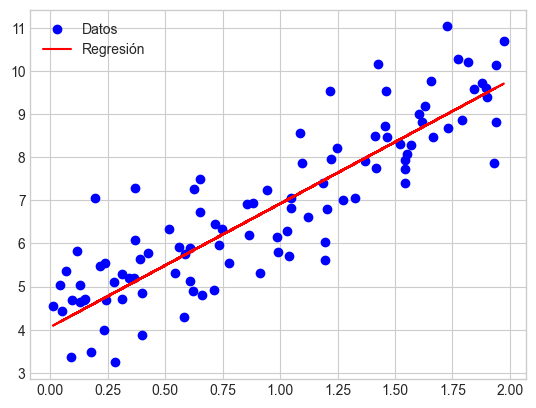

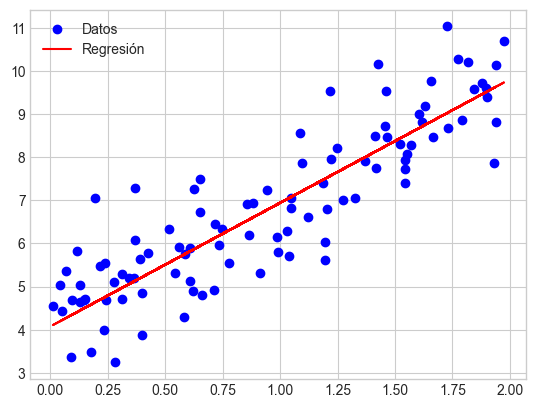

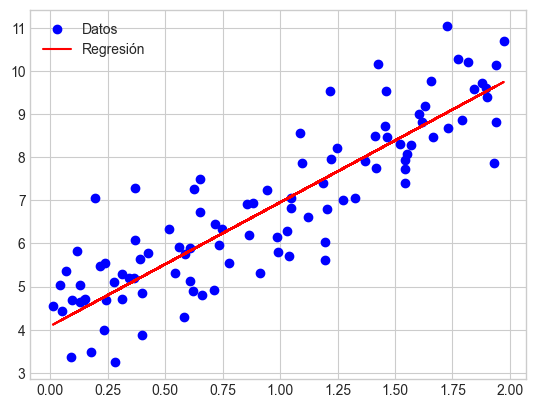

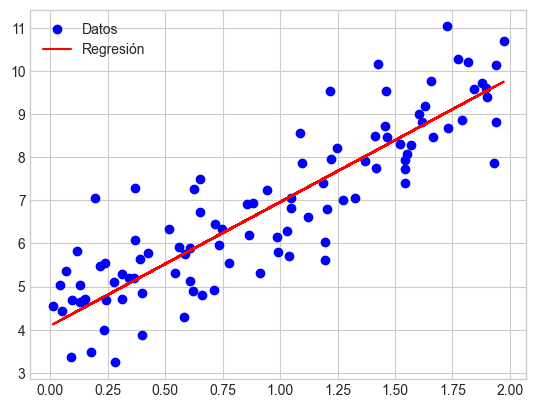

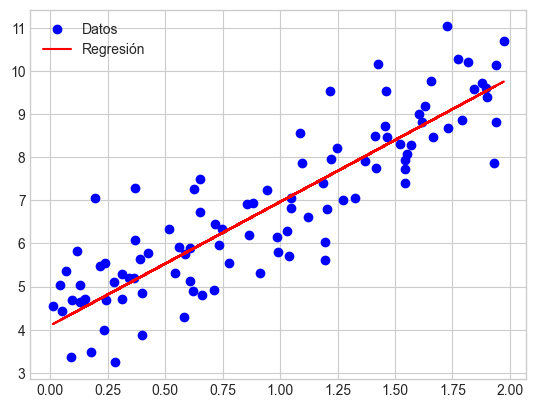

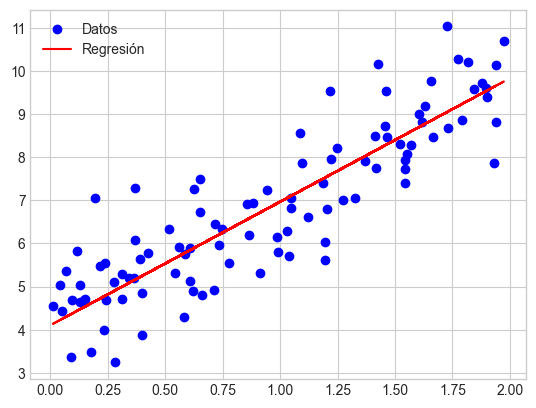

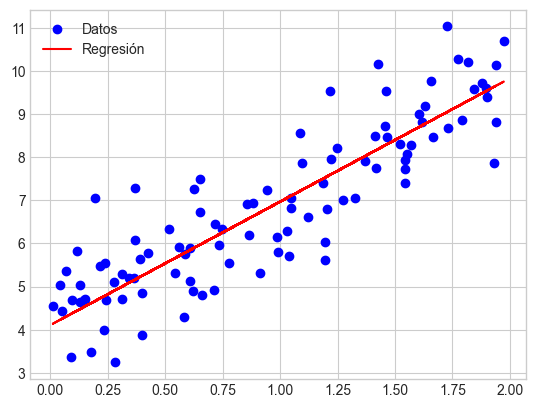

Intercepto estimado: 4.1046983135241195
Pendiente estimada: 2.865830228239851


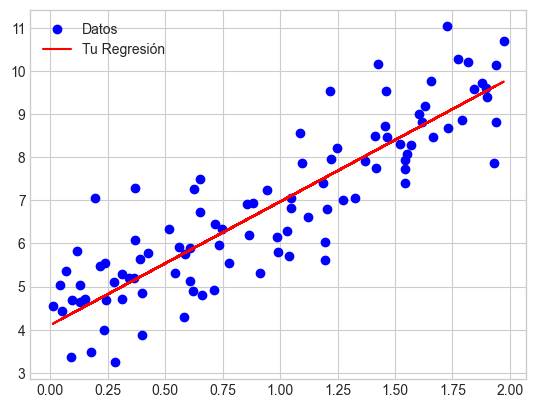

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# --- NO TOCAR: GENERACIÓN DE DATOS ---
np.random.seed(42)
X_mock = 2 * np.random.rand(100, 1)
y_mock = 4 + 3 * X_mock + np.random.randn(100, 1)
# -----------------------------------


def evolve_linear_regression( X, y, iteraciones=16, eta=0.1):
    """
    Calcula la pendiente (w) y el intercepto (beta_0)
    usando las fórmulas de OLS con NumPy.
    Returns: (b, w)
    """
    # TU CÓDIGO AQUÍ

    n = len(X)
    #Generacion aleatoria de parametros (numpy)
    w = np.random.randn()
    b = np.random.randn()

    for i in range(1, iteraciones):
        # calcular el error
        y_pred = b + w * X
        error = y - y_pred

        # Calcular gradientes
        dw = (-2/n) * np.sum(X * error)
        db = (-2/n) * np.sum(error)

        #Ajustar parametros
        w = w - eta * dw
        b = b - eta * db

        #pintar recta
        pintar_recta(b, w, X, y)

    return b, w

def pintar_recta(b, w, X, y):
    plt.scatter(X, y, color='blue', label='Datos')
    plt.plot(X, b + w * X, color='red', label='Regresión')
    plt.legend()
    plt.show()


# Probemos tu función
b, w = evolve_linear_regression(X_mock, y_mock)
print(f"Intercepto estimado: {b}")
print(f"Pendiente estimada: {w}")

# Verificación visual
plt.scatter(X_mock, y_mock, color='blue', label='Datos')
plt.plot(X_mock, b + w * X_mock, color='red', label='Tu Regresión')
plt.legend()
plt.show()

## PARTE 4: Series Temporales (Datos Simulados)

**Objetivo:** Analizar tendencias y estacionalidad en una serie temporal generada.

**Tareas:**
1.  Convierte el índice a formato DateTime.
2.  Haz un resampleo mensual (`'M'`) mostrando la media de ventas.
3.  Calcula una **Media Móvil** de 3 meses para suavizar la curva.
4.  Usa `seasonal_decompose` para visualizar los componentes (Tendencia, Estacionalidad y ruido).

---

Amplia Con:

- **Generación de la serie**
  Describe brevemente cómo se ha generado la serie temporal simulada, indicando si incluye tendencia, estacionalidad y ruido.

- **Comparación de suavizados**
  Calcula una segunda media móvil con una ventana distinta y compara visualmente ambos suavizados. Comenta las diferencias observadas.

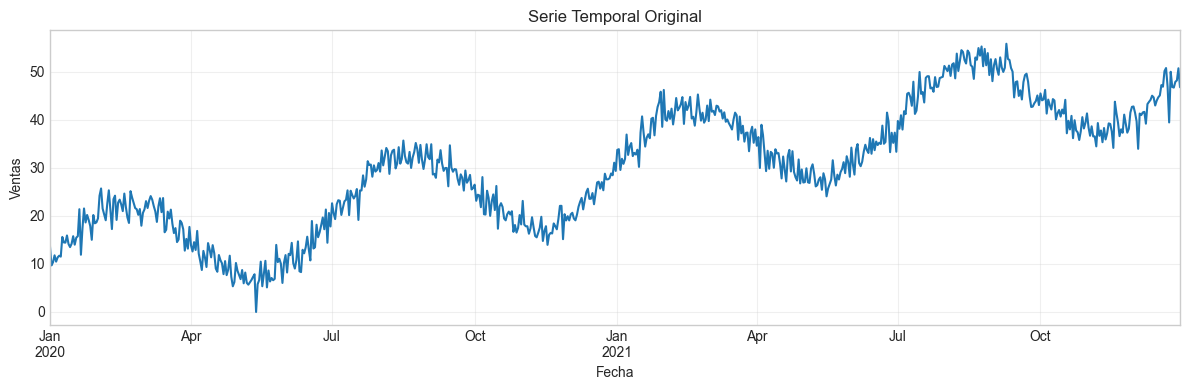

C:\Users\adria\AppData\Local\Temp\ipykernel_6840\2540795957.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = ts_df['Sales'].resample('M').mean()


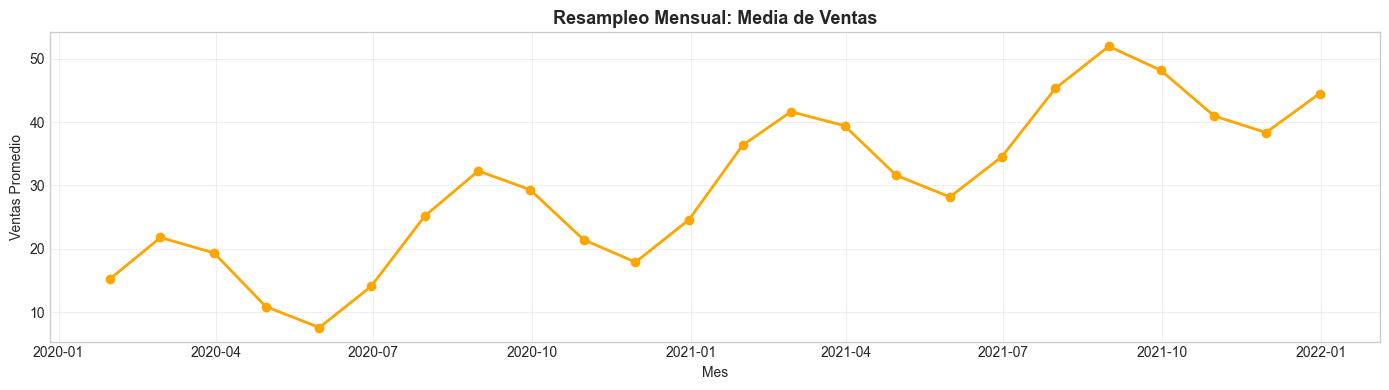

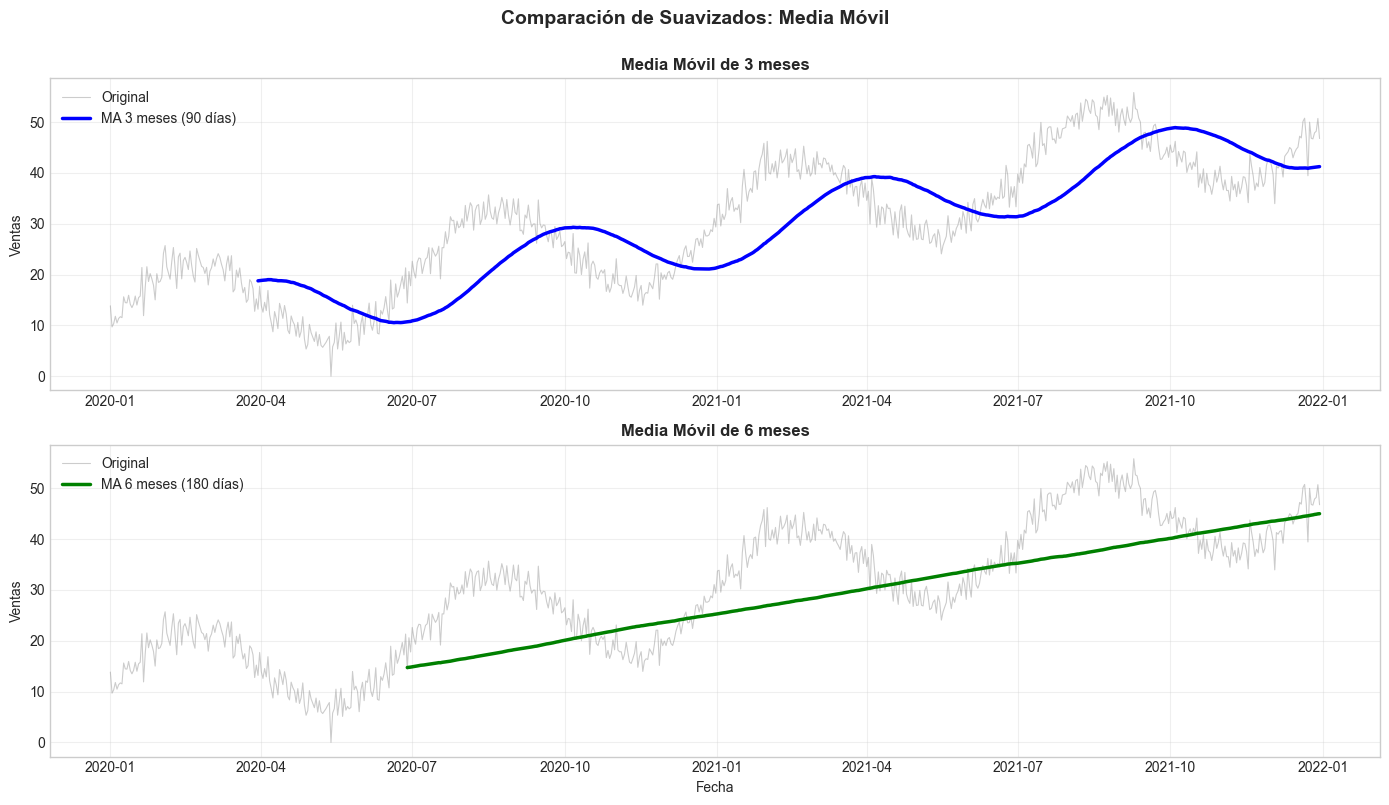

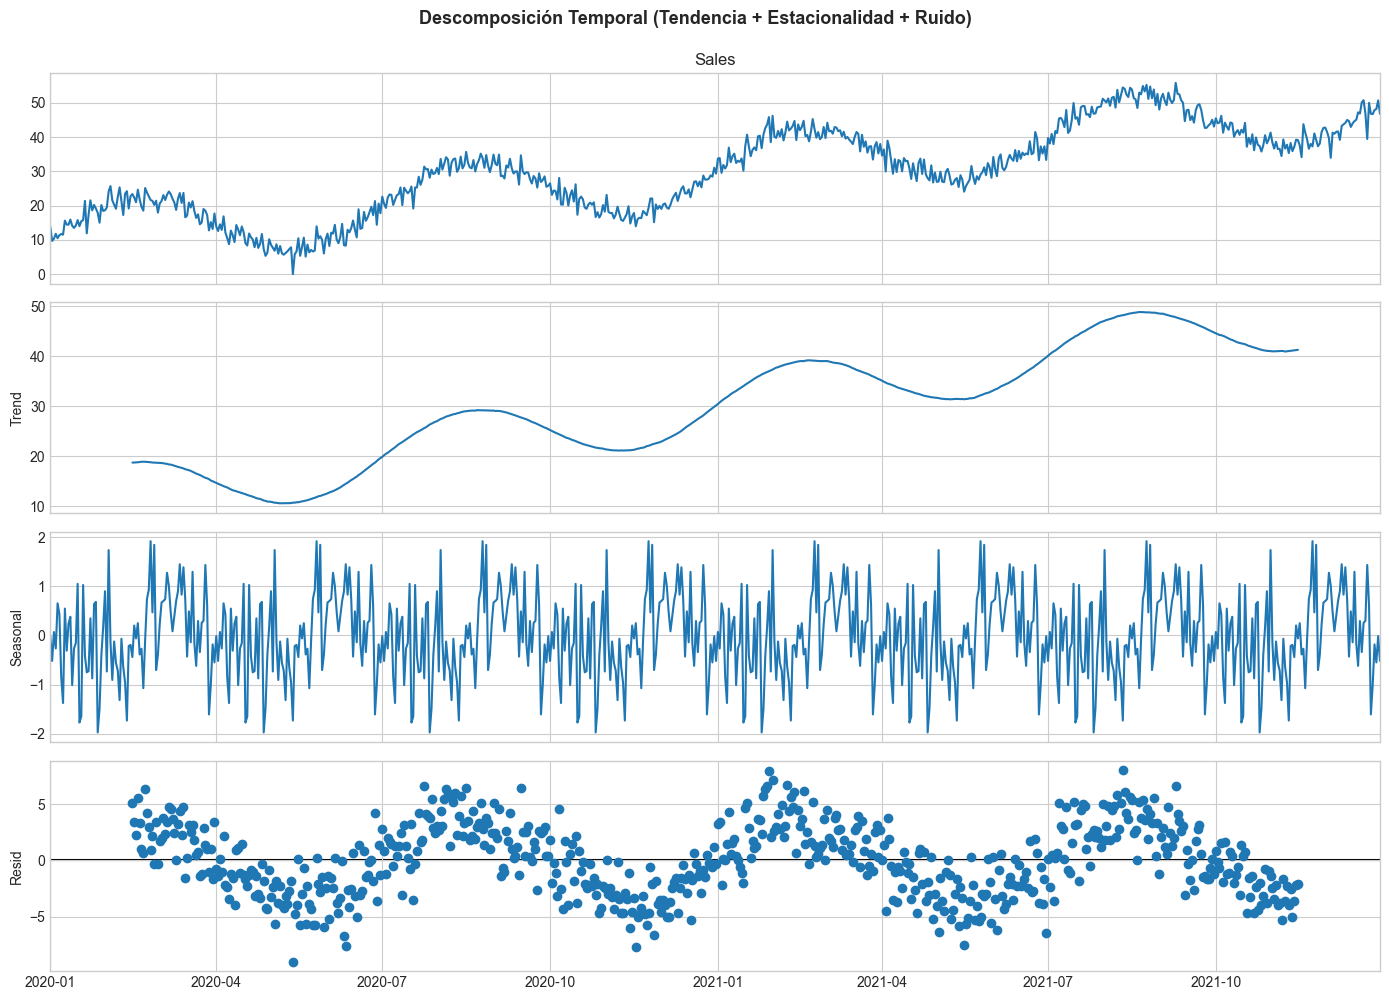

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# --- NO TOCAR: GENERACIÓN DE DATOS TEMPORALES ---
dates = pd.date_range(start='2020-01-01', periods=365*2, freq='D')
values = np.linspace(10, 50, len(dates)) + 10 * np.sin(np.linspace(0, 3.14*8, len(dates))) + np.random.normal(0, 2, len(dates))
ts_df = pd.DataFrame({'Sales': values}, index=dates)
# -----------------------------------------------

# TU CÓDIGO AQUÍ

# 1. Plot inicial
ts_df['Sales'].plot(title='Serie Temporal Original', figsize=(12,4))
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Resampleo Mensual
monthly_sales = ts_df['Sales'].resample('M').mean()

plt.figure(figsize=(14, 4))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linewidth=2, color='orange')
plt.title('Resampleo Mensual: Media de Ventas', fontsize=13, fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Ventas Promedio')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Media Móvil

# Media móvil de 3 meses (≈ 90 días)
ts_df['MA_3_meses'] = ts_df['Sales'].rolling(window=90).mean()

# Media móvil de 6 meses (≈ 180 días) para comparar
ts_df['MA_6_meses'] = ts_df['Sales'].rolling(window=180).mean()

# Visualización comparativa
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Media Móvil 3 meses
axes[0].plot(ts_df.index, ts_df['Sales'], alpha=0.4, linewidth=0.8, label='Original', color='gray')
axes[0].plot(ts_df.index, ts_df['MA_3_meses'], color='blue', linewidth=2.5, label='MA 3 meses (90 días)')
axes[0].set_title('Media Móvil de 3 meses', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Ventas')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Media Móvil 6 meses
axes[1].plot(ts_df.index, ts_df['Sales'], alpha=0.4, linewidth=0.8, label='Original', color='gray')
axes[1].plot(ts_df.index, ts_df['MA_6_meses'], color='green', linewidth=2.5, label='MA 6 meses (180 días)')
axes[1].set_title('Media Móvil de 6 meses', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Ventas')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.suptitle('Comparación de Suavizados: Media Móvil', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# 4. Descomposición

# Descomponer la serie temporal
result = seasonal_decompose(ts_df['Sales'], model='additive', period=91)  # 91 días ≈ 3 meses

# Visualizar componentes
fig = result.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Descomposición Temporal (Tendencia + Estacionalidad + Ruido)', 
             fontsize=13, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


## Análisis de Serie Temporal: Conclusiones

### Resultados Observados

**Serie Original:**
La gráfica muestra una **tendencia ascendente clara** de 2020 a 2022, con ventas que prácticamente se quintuplican. Superpuestos a esta tendencia, se observan **picos y valles recurrentes** que se repiten aproximadamente cada 3 meses, creando un patrón ondulado sobre la línea creciente.

**Resampleo Mensual:**
Al agrupar por meses (de 730 días a 24 meses), se reduce el ruido diario y se visualiza más claramente la combinación de crecimiento sostenido más los ciclos estacionales.

---

### Comparación de Suavizados

**Media Móvil de 3 meses (azul):**
- Sigue las **ondulaciones estacionales**, mostrando claramente los ciclos de subidas y bajadas
- Preserva los patrones repetitivos cada trimestre
- Útil para detectar cambios estacionales y planificación trimestral

**Media Móvil de 6 meses (verde):**
- Produce una **línea casi recta ascendente**, eliminando casi toda la estacionalidad
- Muestra únicamente la tendencia general del crecimiento
- Útil para análisis de largo plazo y evaluación del crecimiento global

**Diferencia clave:** A mayor ventana de suavizado, más se eliminan las fluctuaciones estacionales y más clara queda solo la tendencia.

---

### Descomposición Estacional

**1. Tendencia (Trend):**
Línea **suave y ascendente** desde ~10 hasta ~50. Muestra ondulaciones leves debido a que la tendencia captura parte de la estacionalidad suavizada.

**2. Estacionalidad (Seasonal):**
Patrón **cíclico perfectamente regular** que oscila entre +2 y -2 unidades alrededor de cero. Se repite exactamente cada ~91 días, mostrando 8 ciclos completos en los 2 años. Este componente es **predecible y constante**.

**3. Residual (Resid):**
Puntos dispersos aleatoriamente alrededor de cero, sin patrón aparente. La mayoría oscila entre ±5 unidades. Esto confirma que el modelo captura bien la estructura: lo que queda es solo **ruido aleatorio**.

---

### Conclusión

La serie presenta una estructura clara con tendencia ascendente robusta y estacionalidad trimestral predecible. Las herramientas aplicadas (resampleo, medias móviles, descomposición) permiten separar el crecimiento fundamental del negocio de las fluctuaciones estacionales esperadas, facilitando decisiones basadas en patrones reales en lugar de variaciones aleatorias.